## Investigating a Baseball Dataset

#### Problem Definition

Where do the best baseball players come from?

Will a baseball player´s birth location or college location relate to salary or awards?

#### Approach to answer question

Attributes will be needed to describe the location each player is from, these will form independent variables.

These will give a variety of values about where the player came from. However, it boils down to two independent variables, college location and birth location. These variables have different scales i.e. country, state, city. The right granularity will need to be chosen.

To use more independent variables height and weight can also be investigated.

Salaries, AwardsPlayers, AllStarFull and/or HallofFame can be used to give an indication to the quality of the player. Any of these can be used as a dependent variable or a dependent variable could be created out of a combination of these variables.

The dataset has been processed using numpy and pandas to clean, create new variables and merge tables together. See further into the report for a section on data processing. See the preprocessing module for the code used.

An examination of the data will be described followed by data analysis and conclusions. The data analysis is not exhaustive so observations to do not lead to robust conclusions in this report. Any inference is tentative and would require further work to become robust.

In [10]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
# Use the top level of the repository
os.chdir(os.path.join("../.."))
# Helper functions made to create polished plots
from ballbase import figures

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import Baseball_data_investigation
df = Baseball_data_investigation.main()


Processed Hall of Fame data

Processed All Star data

Processed Player Awards data

Processed Salary data

Processed College Locations

Processed master file

Master_Merge is ready

Data Audit complete


#### Data Examination

Overall the dataset is well organised and good to use.

Some datasets display issues regarding how the values are populated

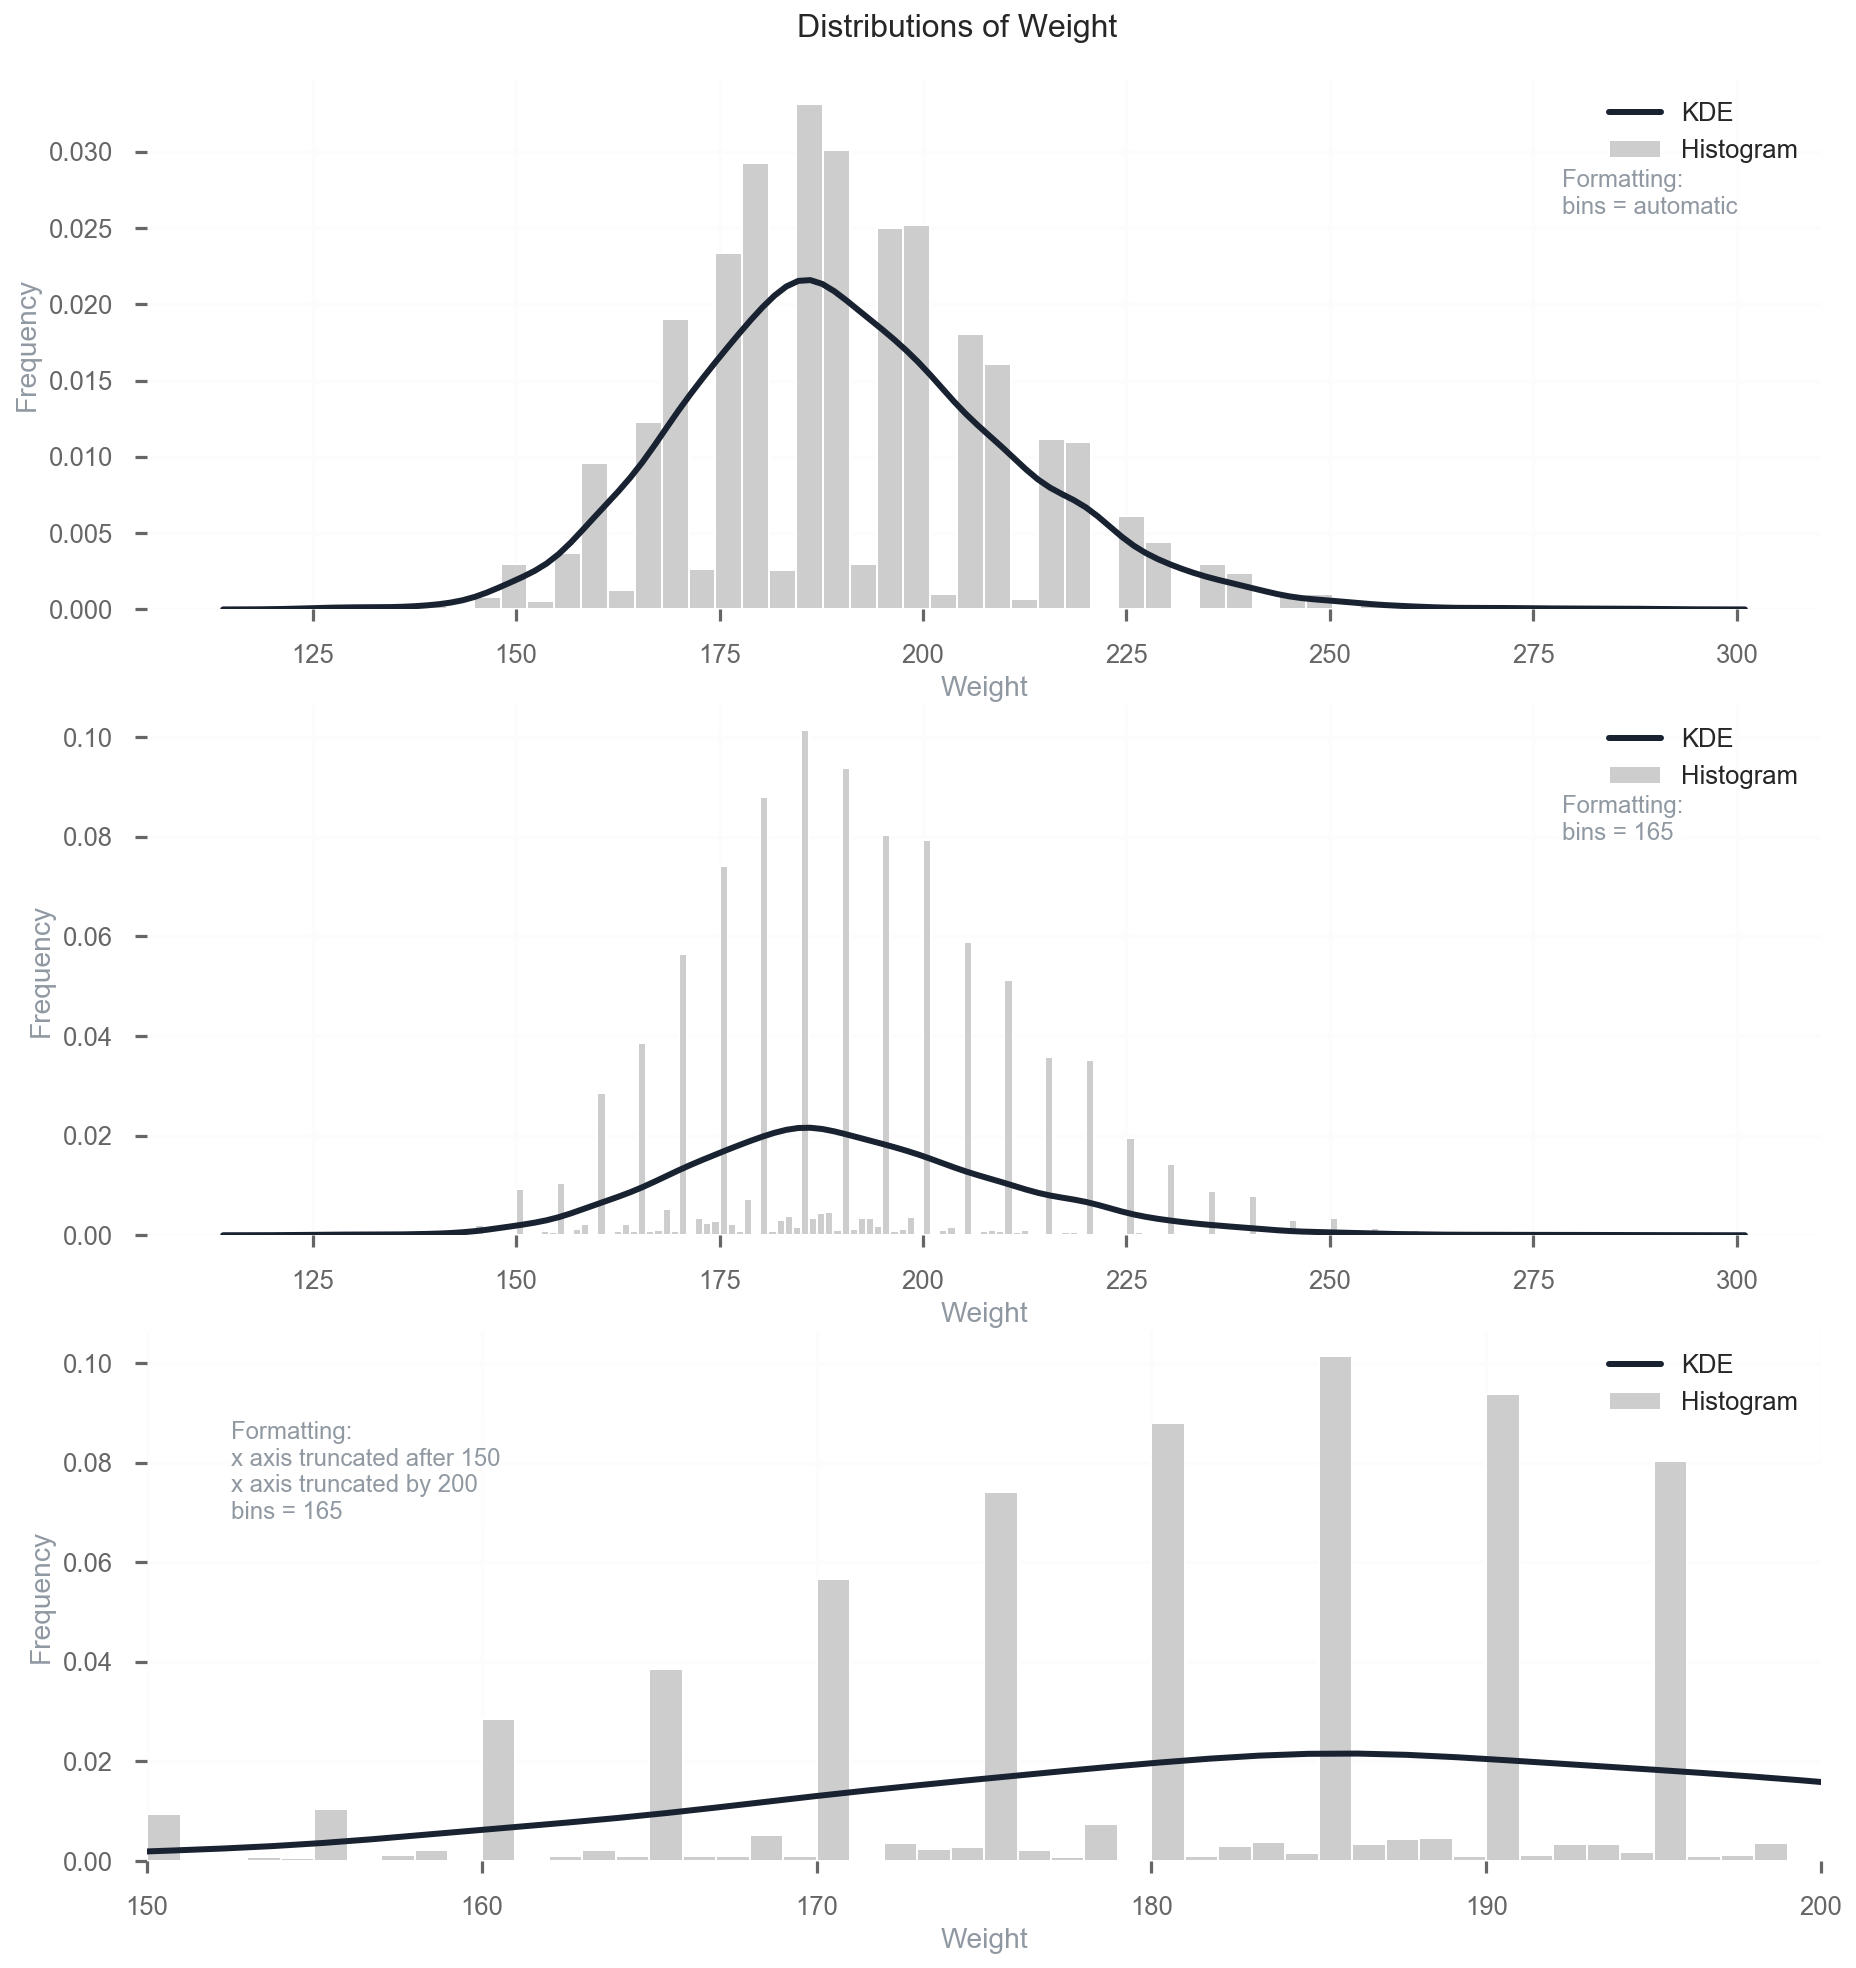

In [11]:
figsize = (15, 15)
# Needed to set up figure style
figures.common_set_up(figsize)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=figsize)

fig.suptitle("Distributions of Weight", fontsize=16)
fig.subplots_adjust(hspace=0.18, top=0.95)

figures.univariate(df['weight'].dropna(), 'Weight', rug=False, bin_n=None, ax=ax1)
figures.univariate(df['weight'].dropna(), 'Weight', rug=False, ax=ax2)
figures.univariate(df['weight'].dropna(), 'Weight', rug=False, 
                   x_truncation_upper=200, x_truncation_lower=150, 
                   formatting_right=False, ax=ax3)

sns.despine(offset=2, trim=True, left=True, bottom=True)

Weight highlights this well. The three figures above are of the same dataset, by reducing the bin numbers to the number of unique values it can be seen that common weight measurements are taken every 5 pounds. The lowermost figure limits the x-axis to highlight this further. Some values are populated according to a higher granularity. A solution to this issue would be to bin weight or similar issues.

Another common theme is highly skewed datasets.

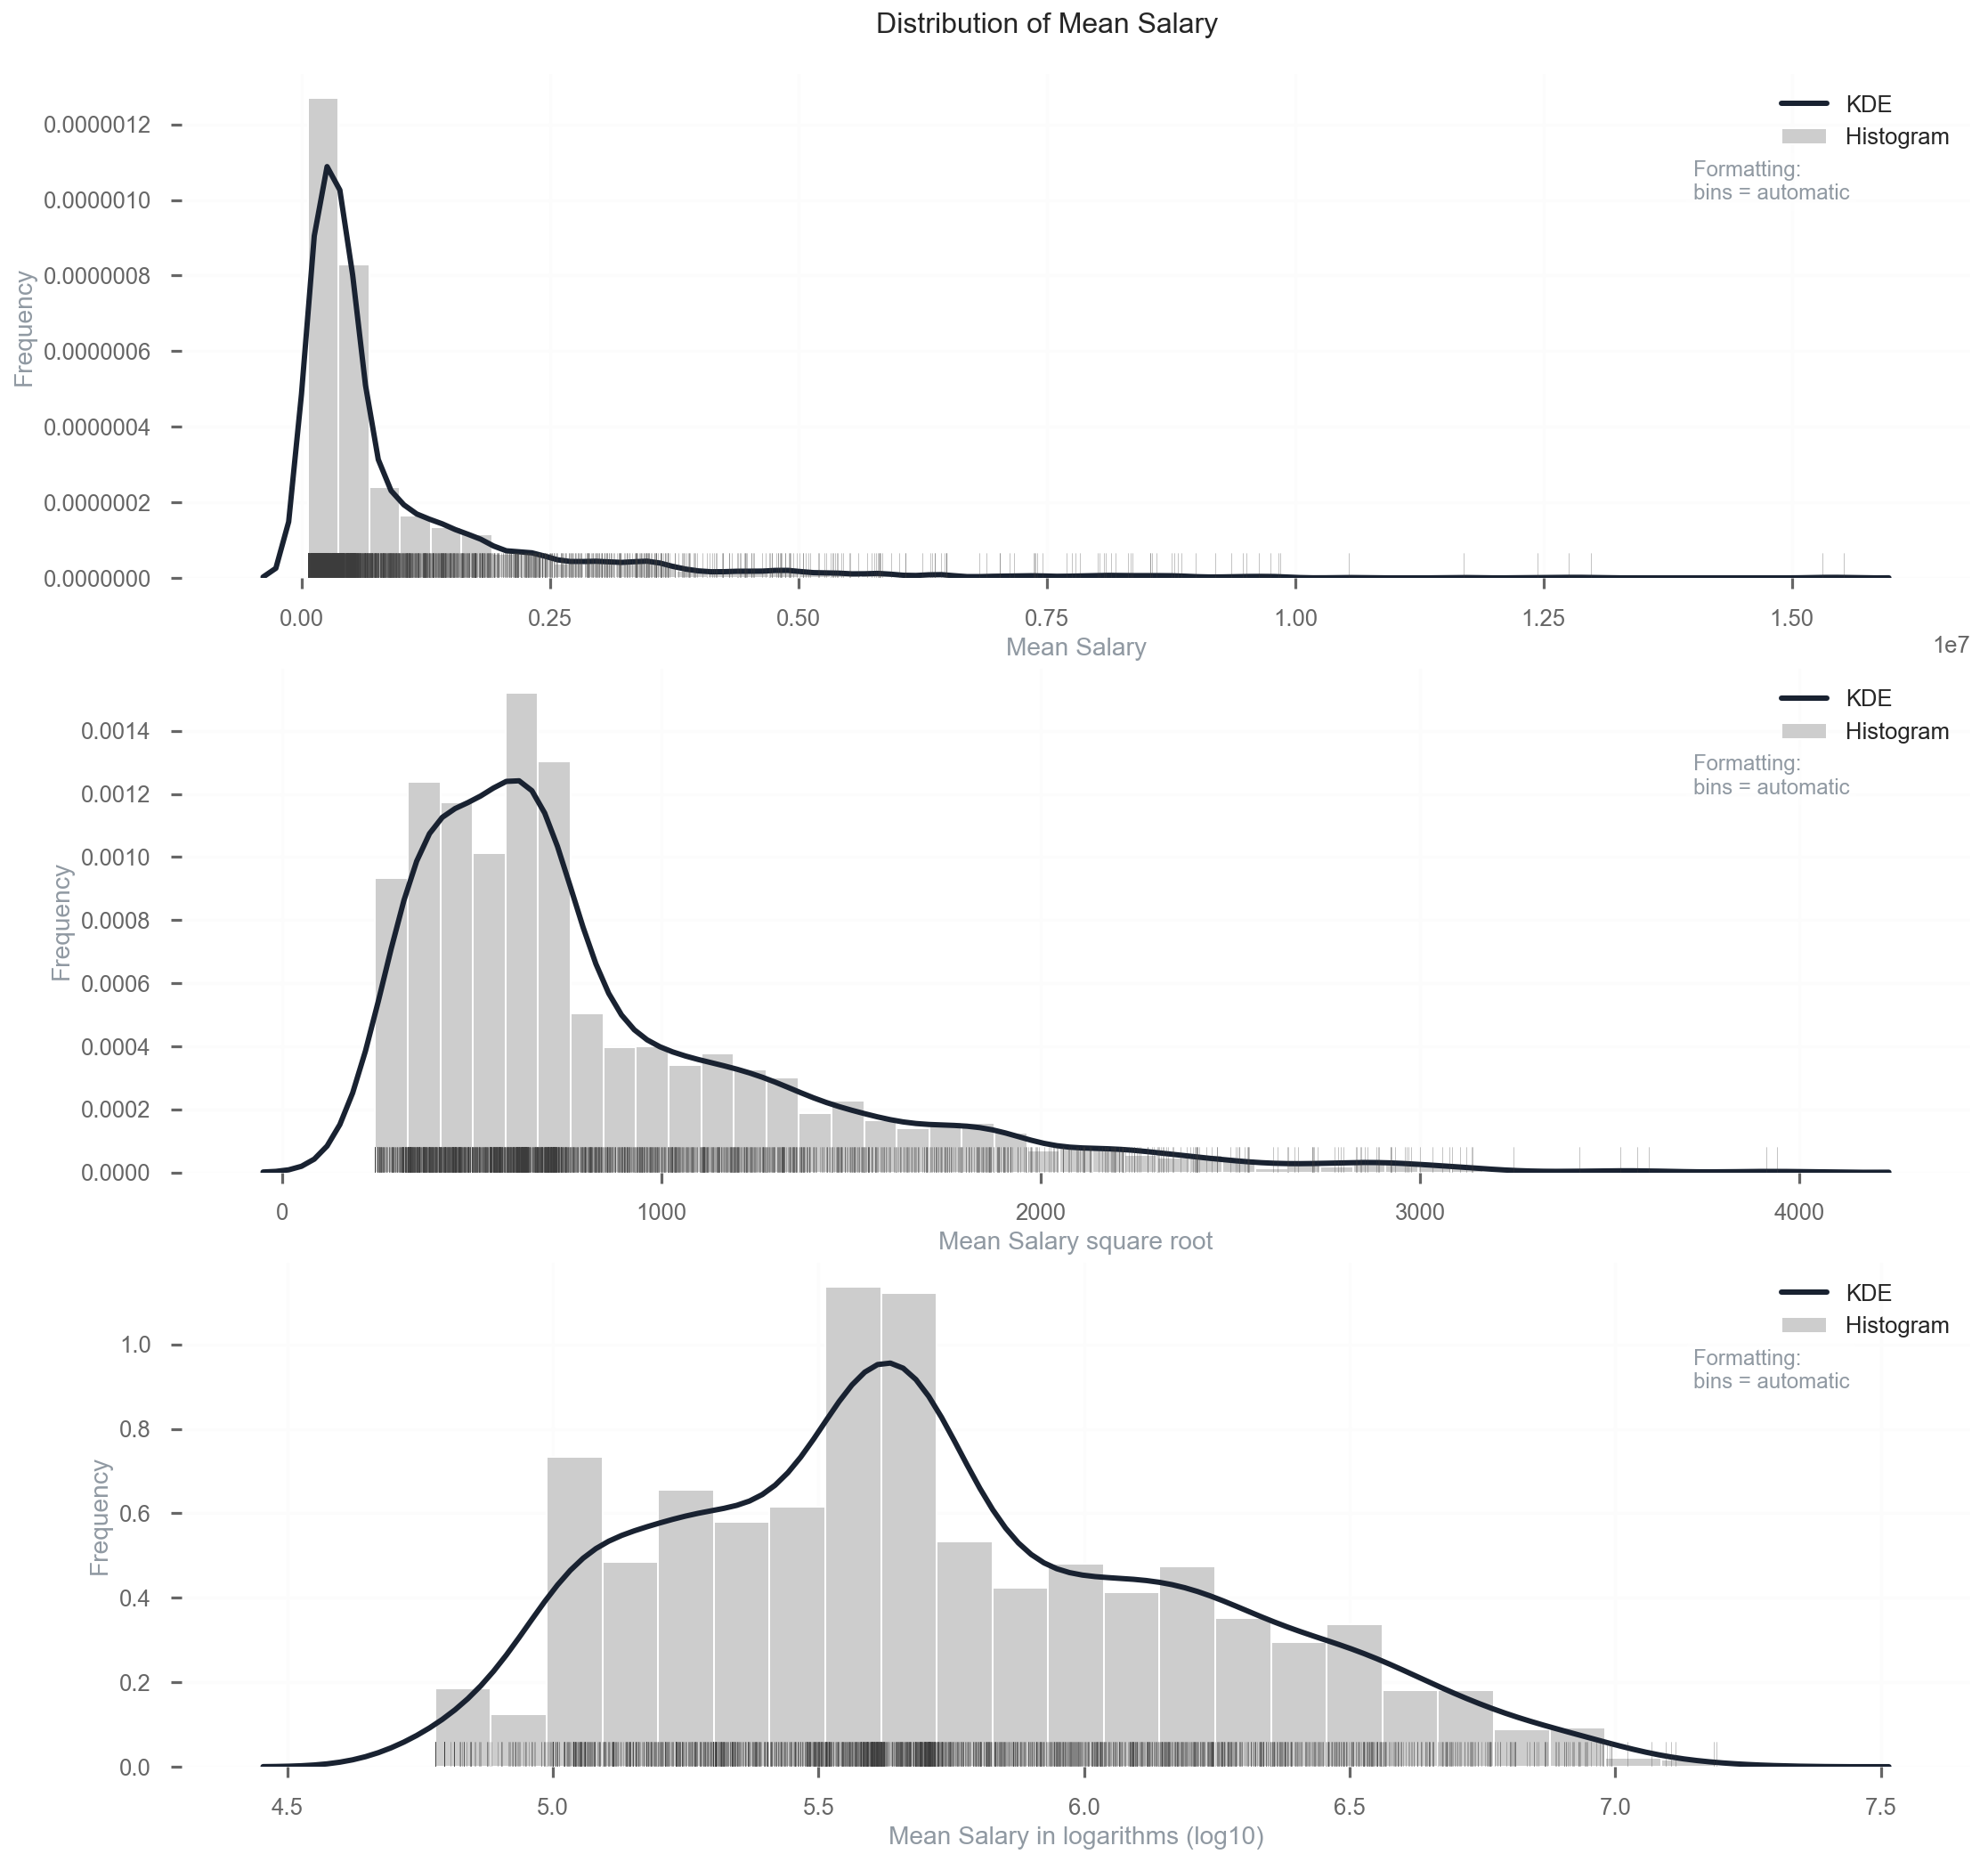

In [12]:
fig_a = figures.dist_transform_plot(df['mean_salary'].dropna(), 'Mean Salary', bin_n=None)

The example of salary shows lognormal distributions with a large dispersion of values towards the maximum value. The number of appearances in All Star matches, player awards and all forms of salary information display this style of data.

The majority of baseball players are born in the USA.
This can be seen in a binary plot showing ratio of players born in the USA using the total data set

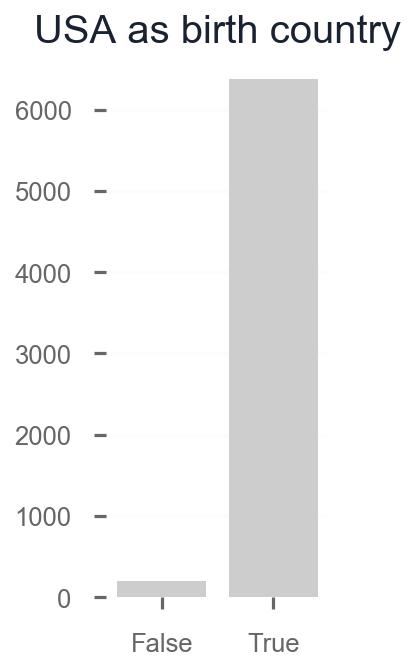

In [9]:
fig_c2 = figures.boolean_bar(df['birthCountry'].dropna()=='USA', 'USA as birth country', annotate=False)

count     6575
unique       2
top       True
freq      6570
Name: college_country, dtype: object

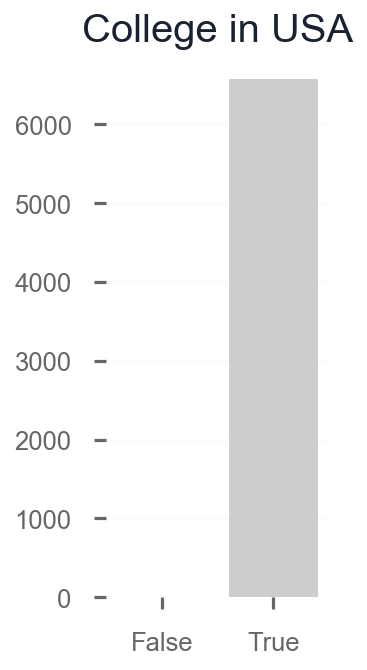

In [14]:
fig_c3 = figures.boolean_bar(df['college_country'].dropna()=='USA', 'College in USA', annotate=False)
(df['college_country'].dropna()=='USA').describe()

This combined with the entire amount of college location information being sourced in the USA steers this investigation to primarily focus on the USA.

It is beyond the scope of this investigation to do a complete audit of all data in this database. Outliers will be assumed to be realistic, nan values will not be interpolated. Queries will ignore missing values.

The reason for this is to look for trends in players that contain the corresponding data rather than interpolating any salary or other information for this analysis.

Two key independent variables for this assessment are player´s birth state and college state. Both of these are categorical.

California is highlighted in both bar graphs below as the most common occurrence. There is a variety across the other states, the two count bar graphs do not give any information about how related a birth State and college State is.

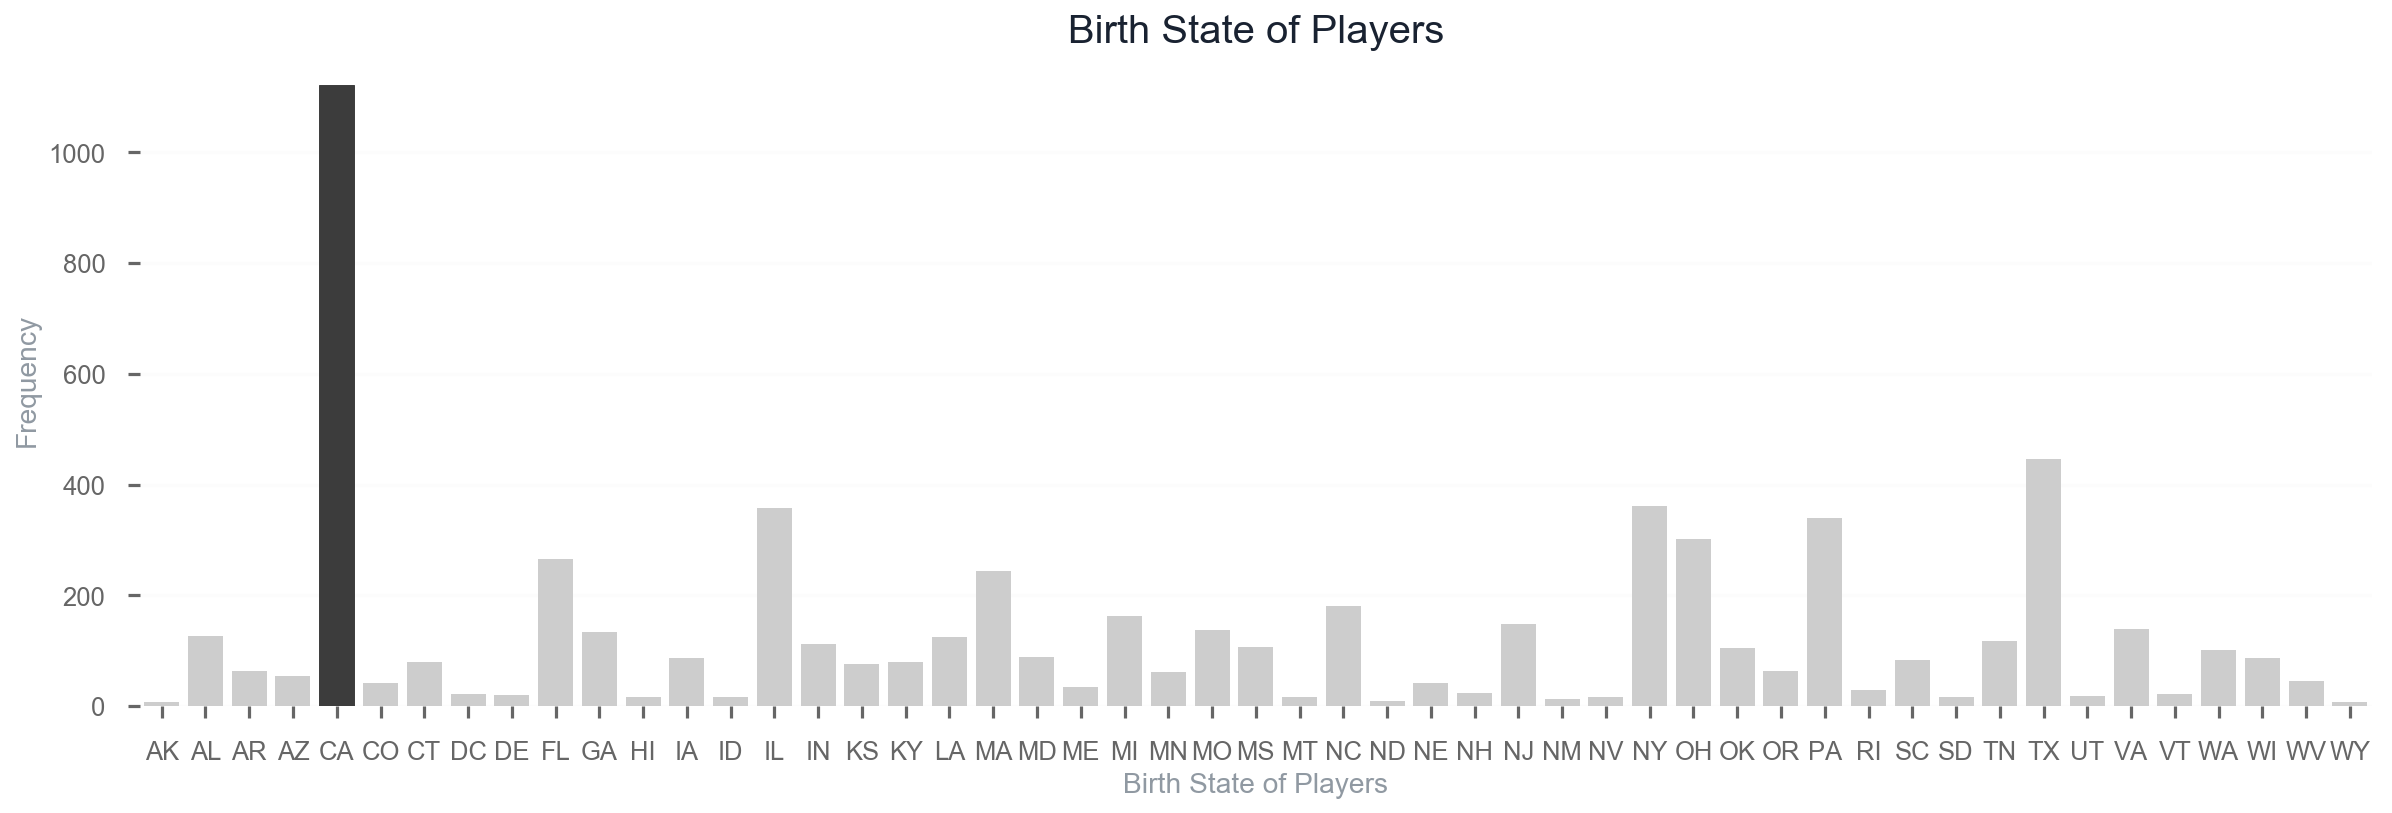

In [15]:
# df where birthCountry == USA, sort on birthState then display birthState
fig_c4 = figures.count_bar((
                            df[                              # From DataFrame
                                df['birthCountry'] == 'USA'  # Select only USA as birthCountry
                               ].sort_values(['birthState']) # Sort by birthState
                          ['birthState']),                   # Display birthState
                          'Birth State of Players',
                          highlight=4
                          );

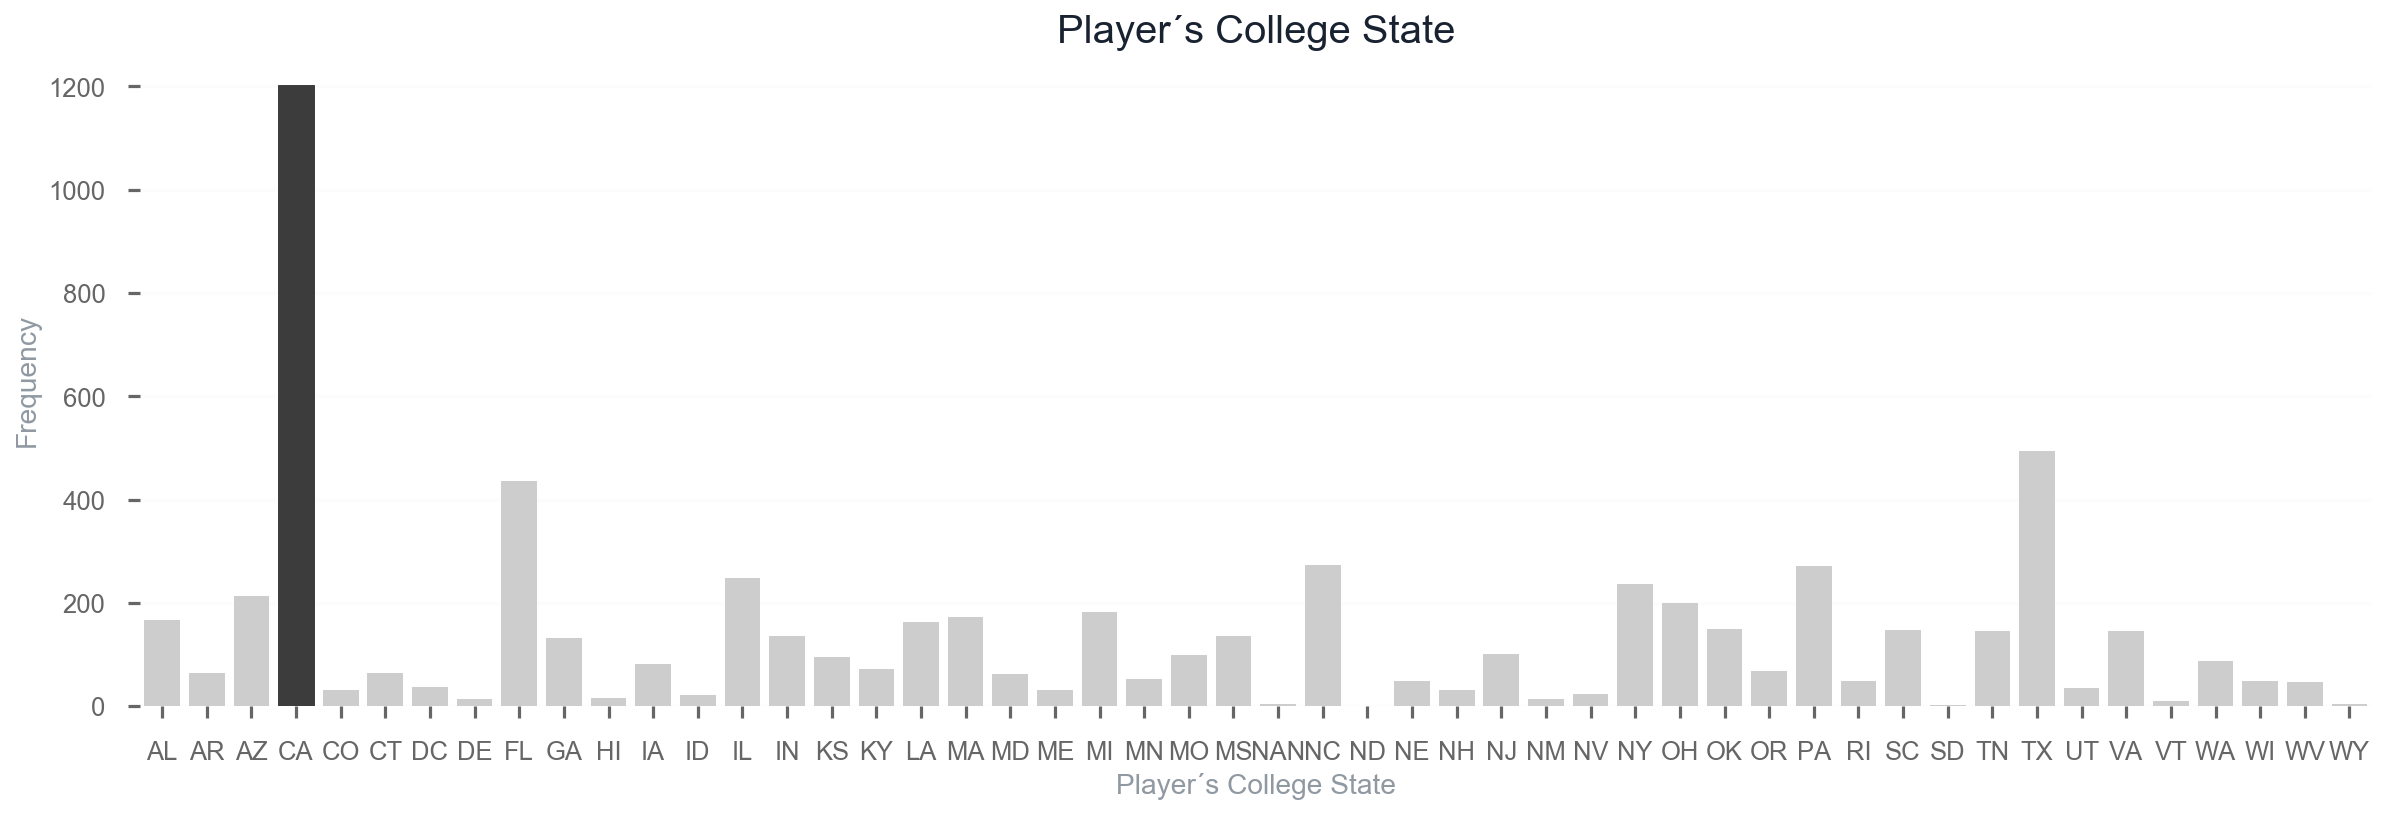

In [16]:
fig_c3 = figures.count_bar((df.sort_values(['college_state'])      # Sort by birthState
                           ['college_state']),                     # Display state of college
                           r"Player´s College State",
                            highlight=3);

The birth city has 2208 unique values in the investigation data set while college cities have 721, giving too much granularity to be considered of use at this stage of the investigation. The state is a more usable aggregated category for analysis.

### Data Analysis

The following section is a brief, preliminary data analysis. This is not a thorough exploratory data analysis or a more sophisticated data analysis to test any hypotheses in the data.

The question is related to the effect of geographic location on the quality of base ball players.

To begin a different independent variable can be compared to the dependent variables to see if there are no relationships. Height and weight would not be expected to have a strong correlation to dependent variables.

Height vs. weight, two independent shows a strong correlation.

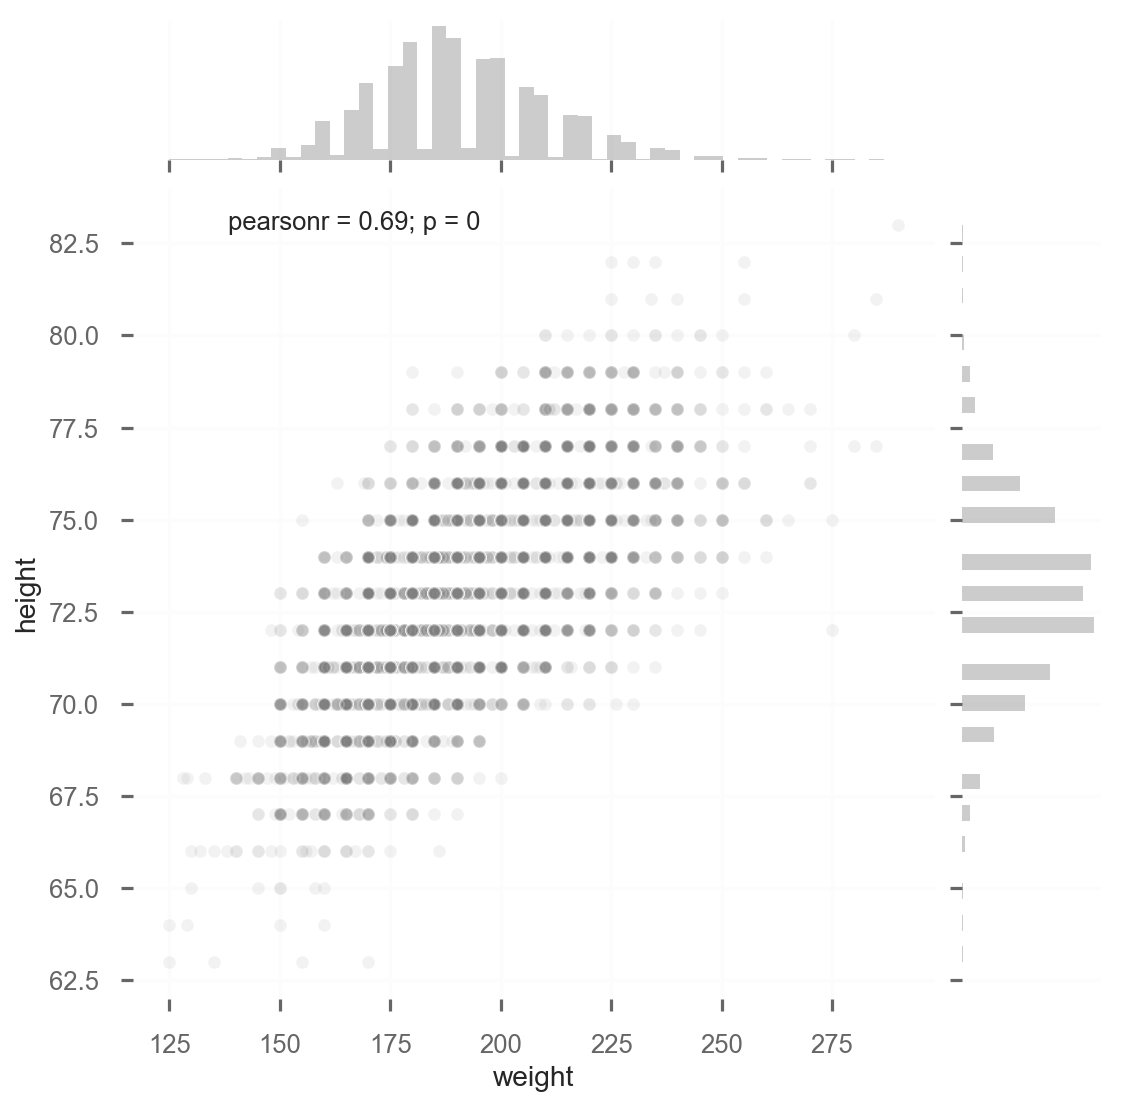

In [17]:
sns.jointplot(x='weight', y='height', data=df[['weight', 'height']].dropna(), 
              s=40, alpha=0.1, color="grey", edgecolor="w", linewidth=1, size=8);
sns.despine(offset=2, trim=True, left=True, bottom=True)

When comparing one of these independent variables to a dependent variable like the mean career salary there is little correlation. The distribution reflects the normal distribution of the weight variable.

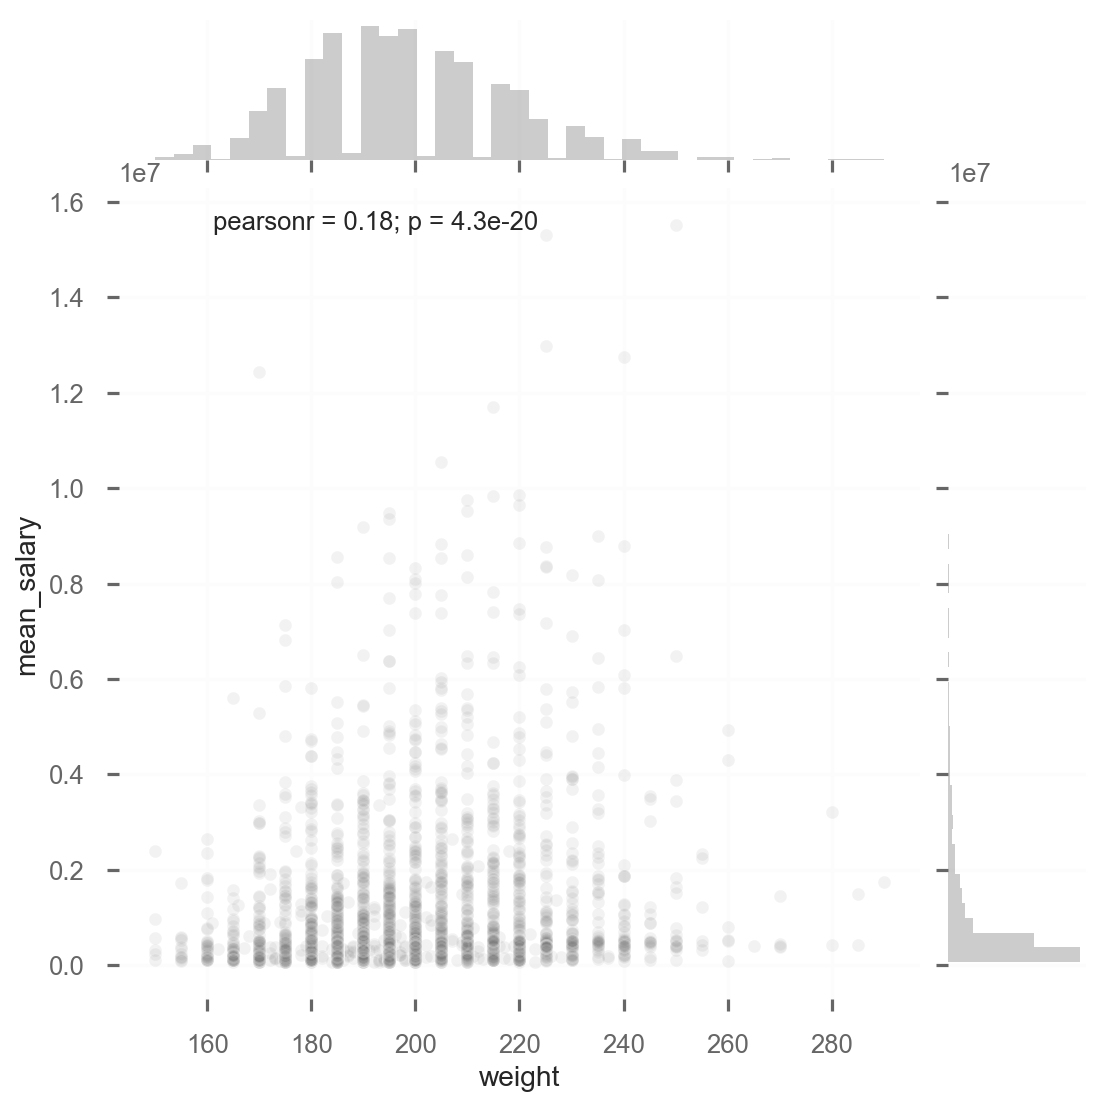

In [18]:
sns.jointplot(x='weight', y='mean_salary', data=df[['weight', 'mean_salary']].dropna(), 
              s=40, alpha=0.1, color="grey", edgecolor="w", linewidth=1, size=8);
sns.despine(offset=2, trim=True, left=True, bottom=True)

This is one example where there is not a strong relationship, the Pearson correlation coefficient is only 0.18.

Before investigating the geography of a player the dependent variables can be compared to each other. There are a few options here from salary, Allstar counts and award counts that can be compared to the independent variables.

The mean career salary and max ever career salary are compared in the next plot. These show a strong correlation. Note all these plots omit players who do not have both of the variables recorded.

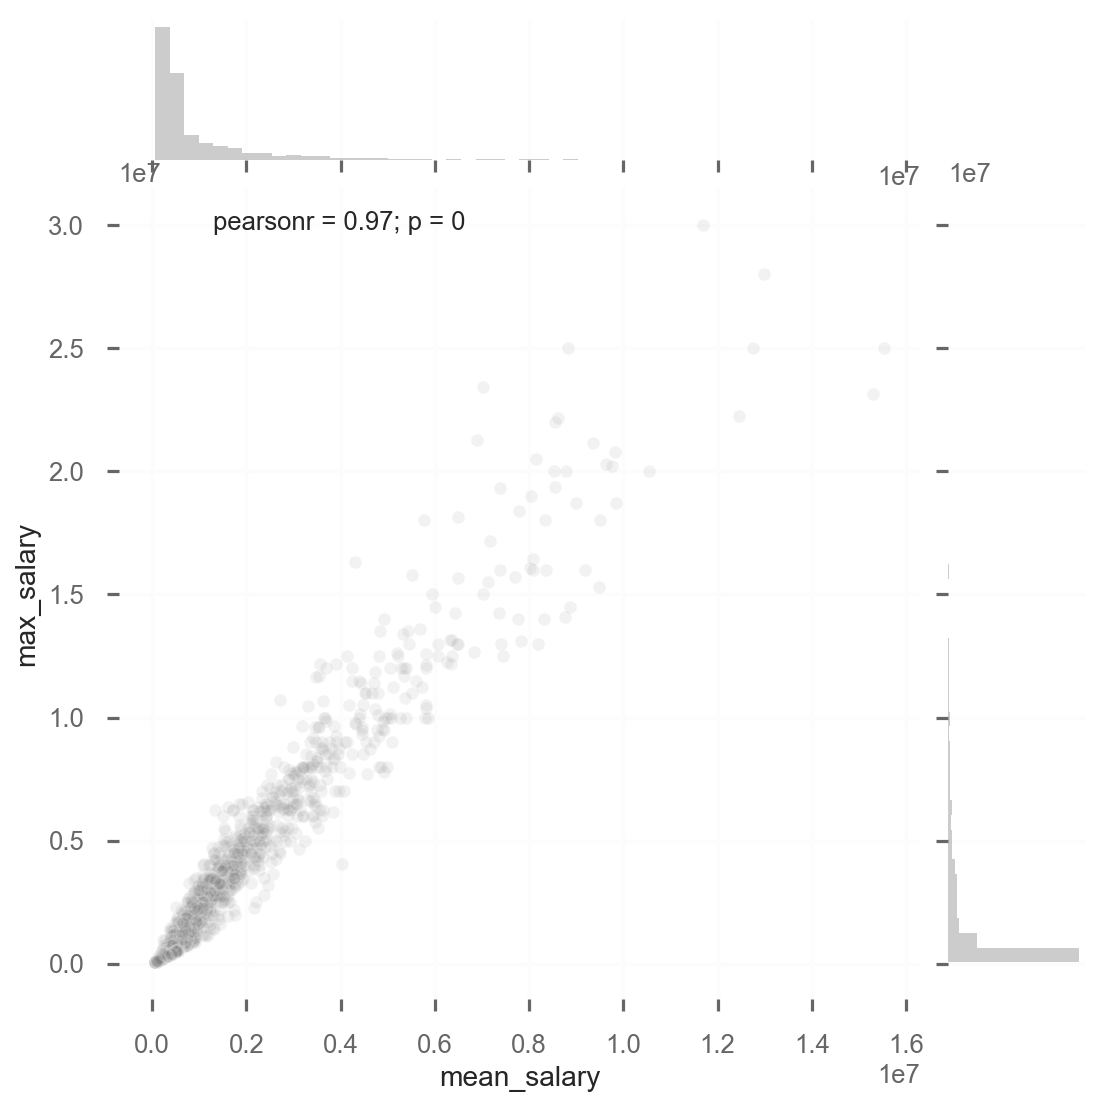

In [19]:
sns.jointplot(x='mean_salary', y='max_salary', data=df[['mean_salary', 'max_salary']].dropna(), 
              s=40, alpha=0.1, color="grey", edgecolor="w", linewidth=1, size=8);
sns.despine(offset=2, trim=True, left=True, bottom=True)

The mean annually standardized career salary compared to the max standardized career, salary shows a similar relationship with a slight curve upwards towards max salary.

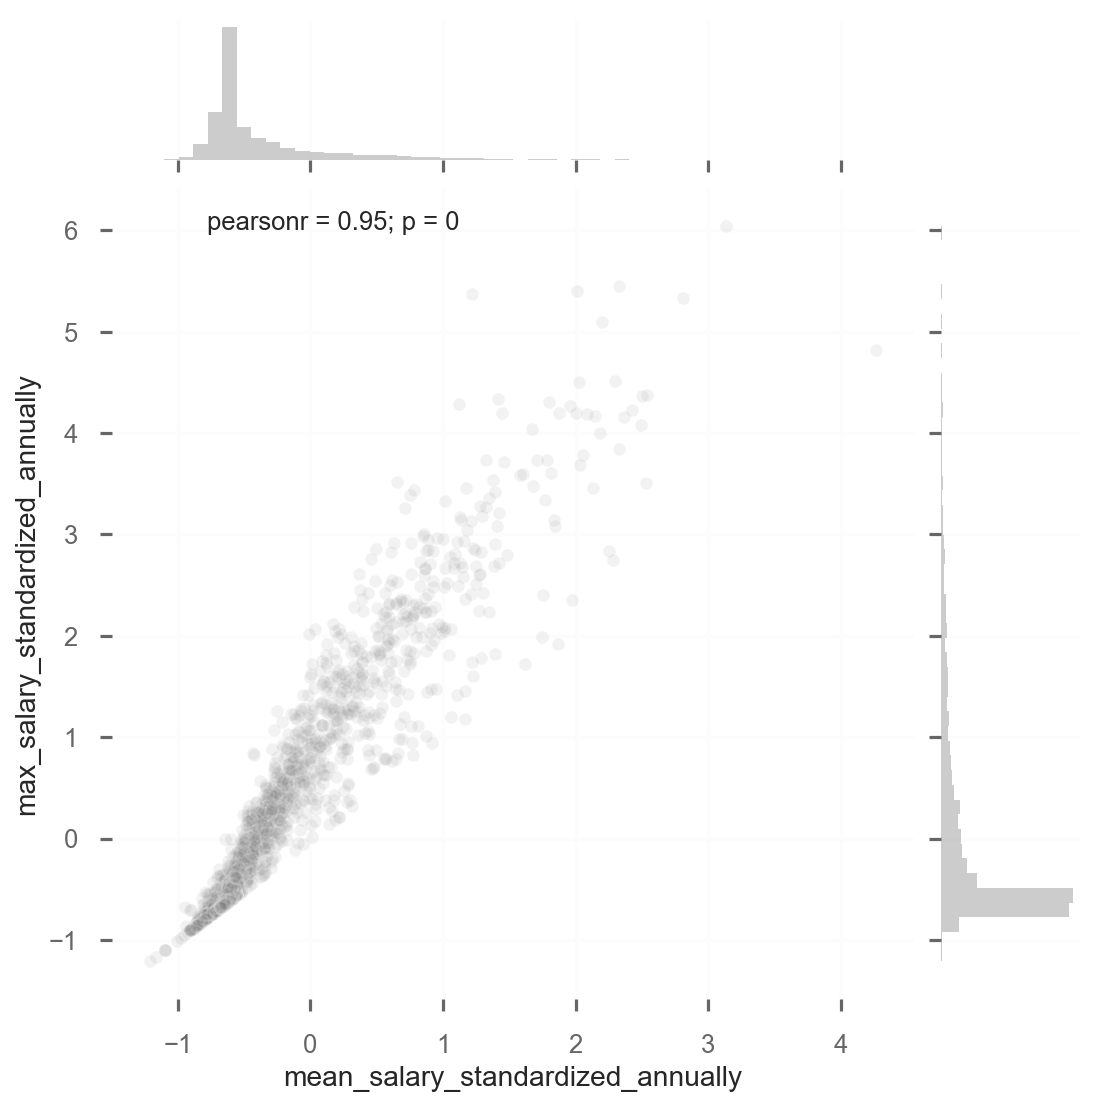

In [20]:
sns.jointplot(x='mean_salary_standardized_annually', y='max_salary_standardized_annually', data=df[['mean_salary_standardized_annually', 'max_salary_standardized_annually']].dropna(), 
              s=40, alpha=0.1, color="grey", edgecolor="w", linewidth=1, size=8);
sns.despine(offset=2, trim=True, left=True, bottom=True)

Comparing award count to Allstar count there is a correlation that scores 0.7 on the Pearson correlation coefficient.

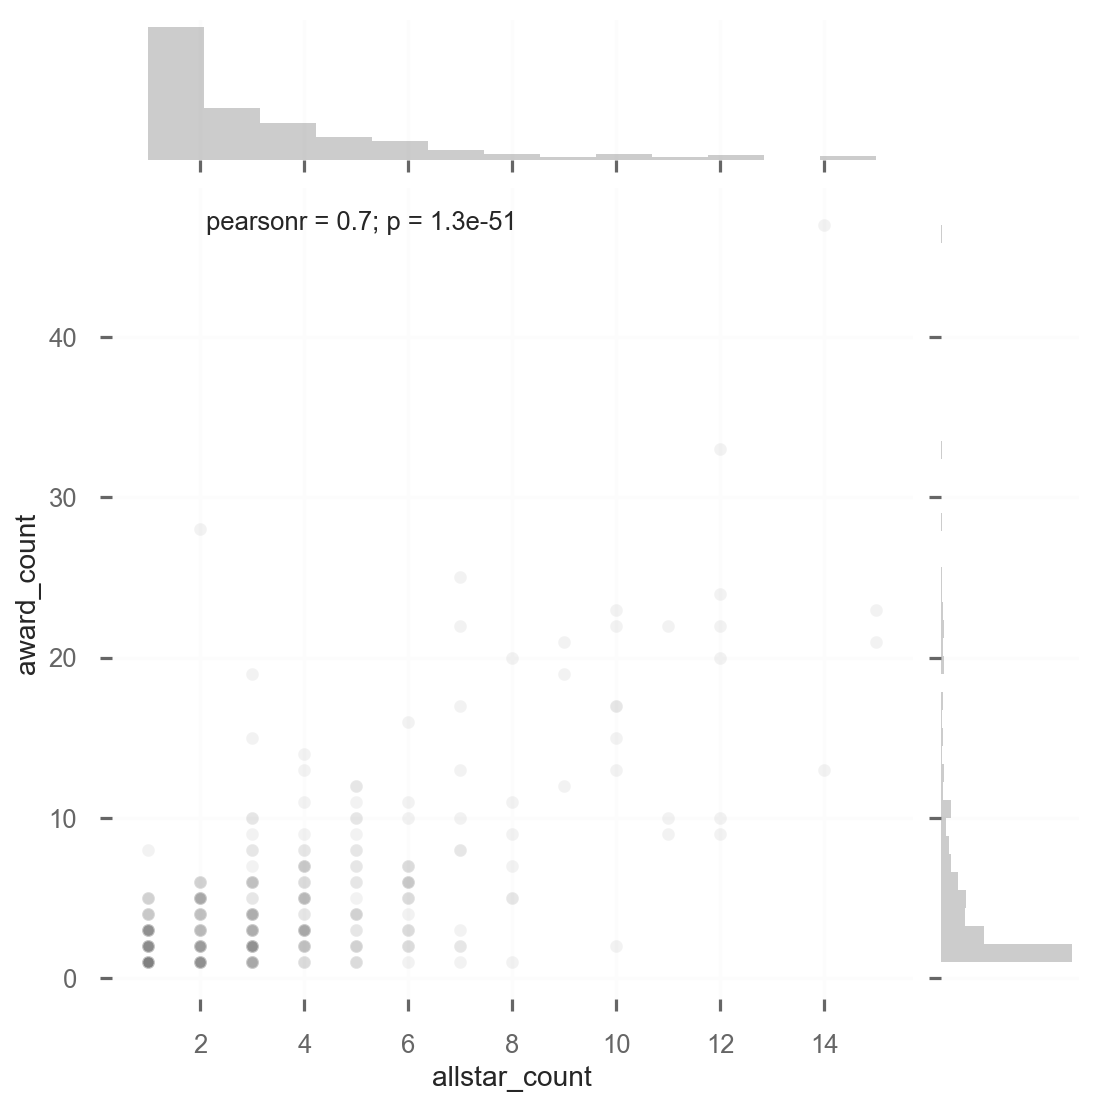

In [21]:
sns.jointplot(x='allstar_count', y='award_count', data=df[['award_count', 'allstar_count']].dropna(), 
              s=40, alpha=0.1, color="grey", edgecolor="w", linewidth=1, size=8);
sns.despine(offset=2, trim=True, left=True, bottom=True)

The independent variables of a players birth state and college state are used to describe their geographic origins. The state is chosen as city is too granular.

The two bar charts show the mean of all players means career salary in a state. It also includes a 95% confidence interval.

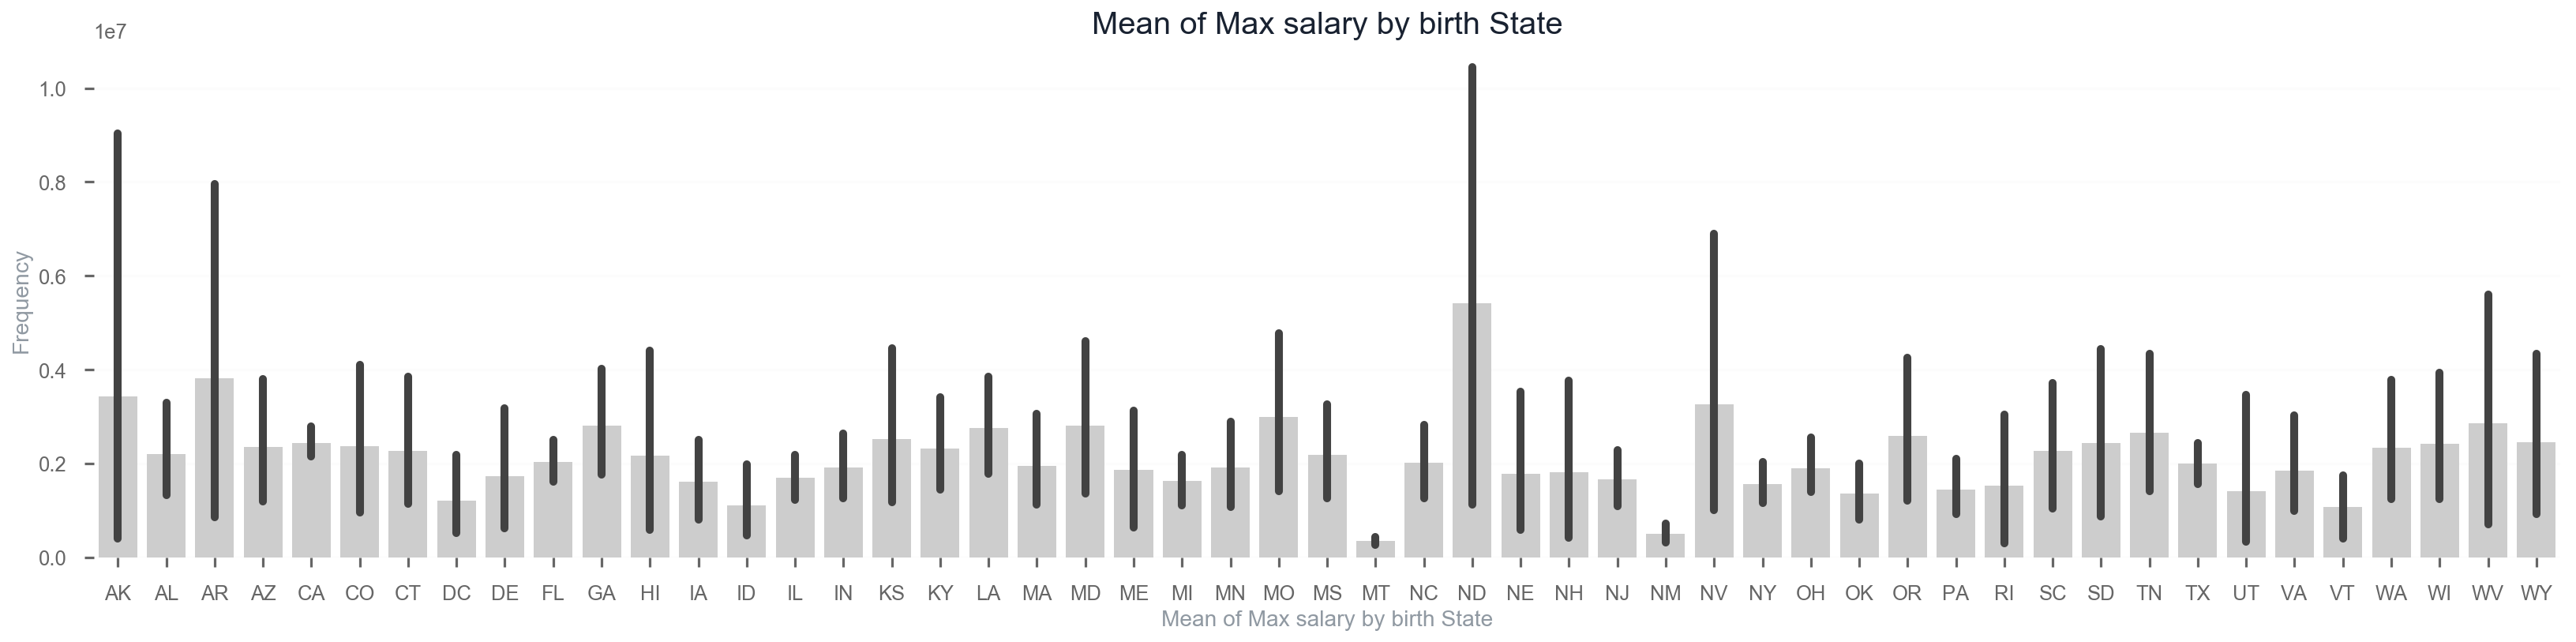

In [27]:
figures.bar(df['max_salary'].dropna(),
            "Mean of Max salary by birth State", 
            x_v=(
                 df[                             # From DataFrame
                    df['birthCountry'] == 'USA'  # Select only USA as birthCountry
                   ].sort_values(['birthState']) # Sort by birthState
                   ['birthState']),
            ax_size=(28, 6),
            highlight=0
            )

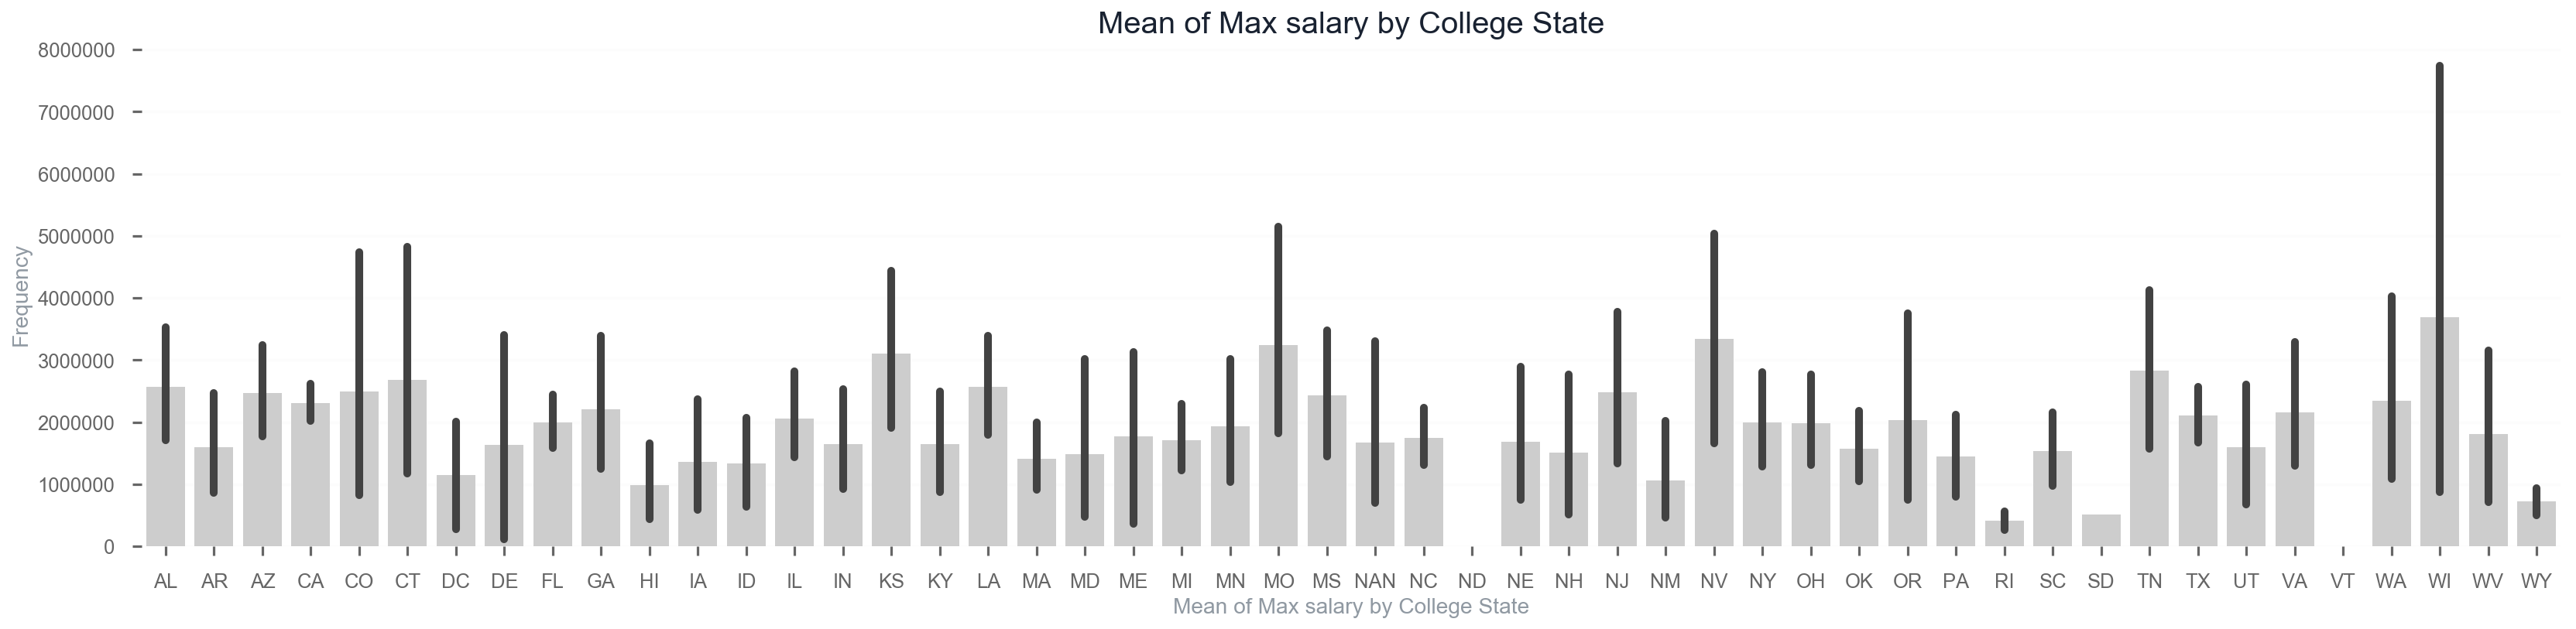

In [28]:
figures.bar(df['max_salary'].dropna(),
            "Mean of Max salary by College State", 
            x_v=(
                 df[                                # From DataFrame
                    df['birthCountry'] == 'USA'     # Select only USA as birthCountry
                   ].sort_values(['college_state']) # Sort by CollegeState
                   ['college_state']),
            ax_size=(28, 6)
            )

The next two images use box plots to describe the distribution of max salary standardized annually by birth state and college state. The limitation of this plot is that there are different numbers within each state making the distribution of values challenging to interpret.

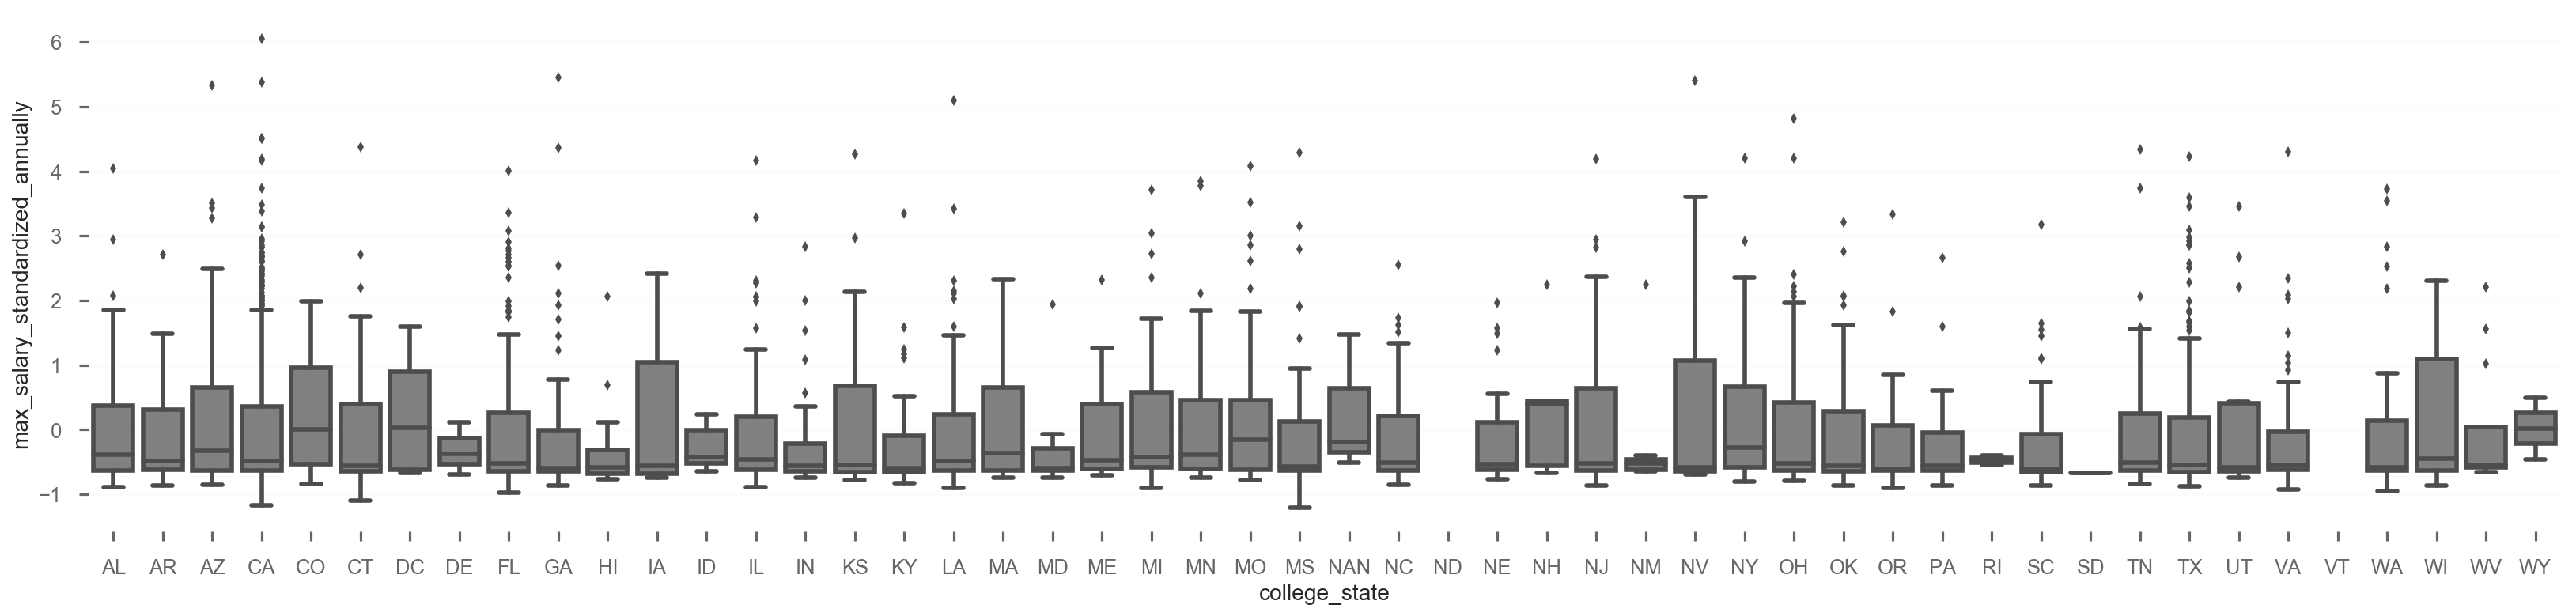

In [29]:
sns.boxplot(x= (df[df['birthCountry'] == 'USA'].sort_values(['college_state'])['college_state']), 
            y=df['max_salary_standardized_annually'].dropna(), data=df, color="grey")
sns.despine(offset=2, trim=True, left=True, bottom=True)

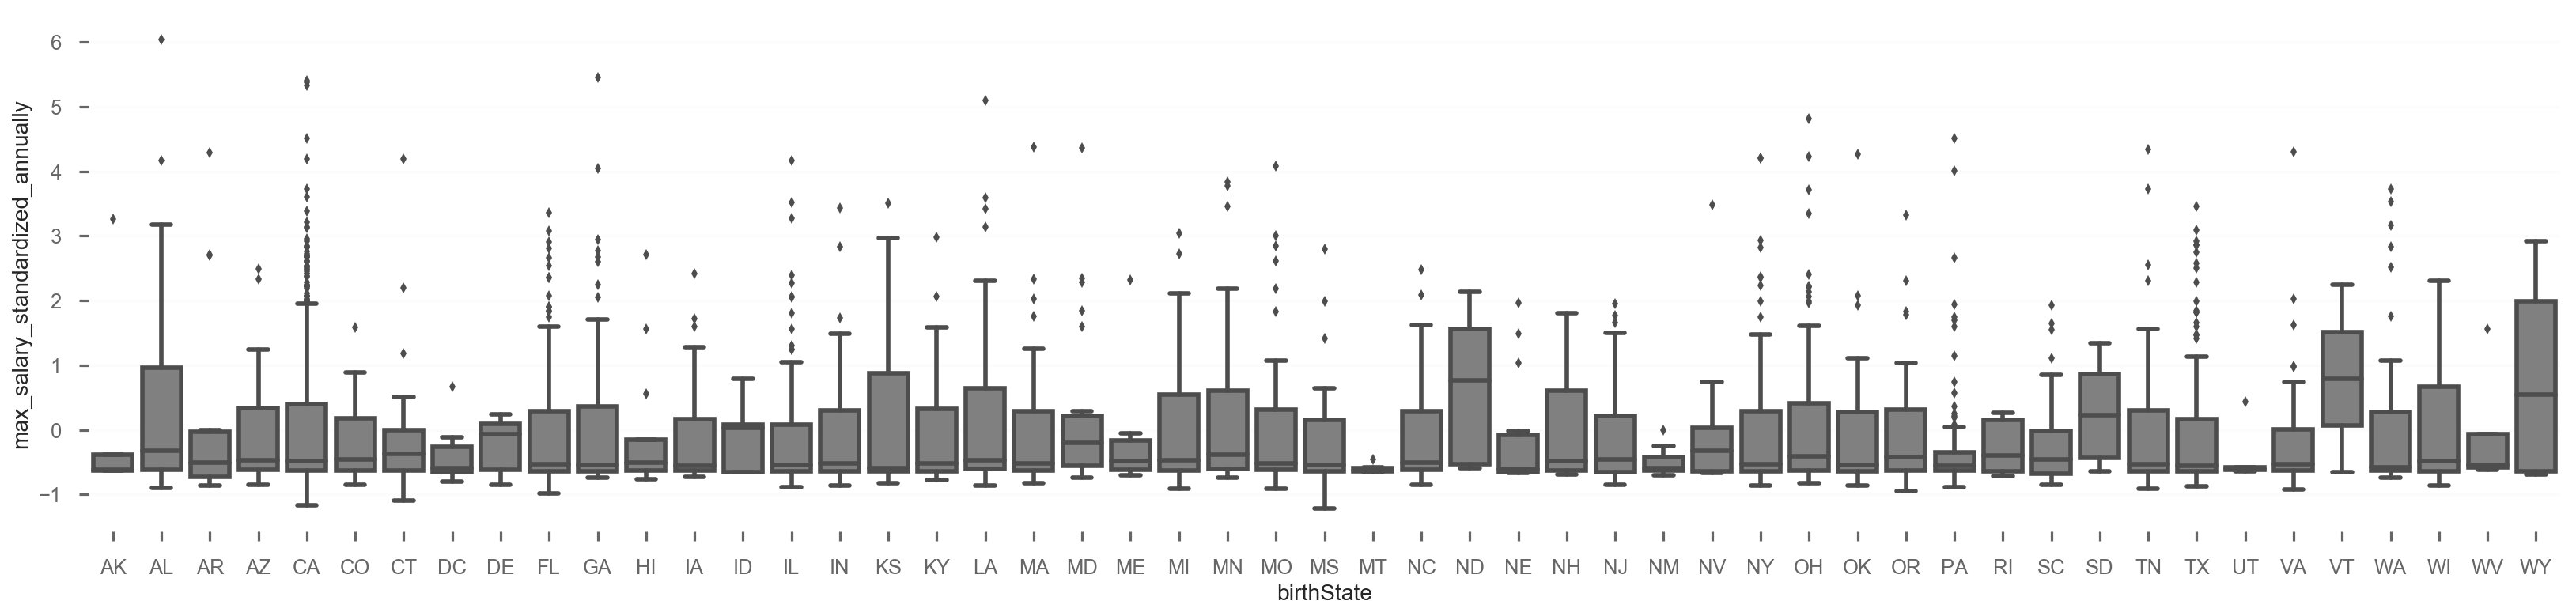

In [30]:
sns.boxplot(x= (df[df['birthCountry'] == 'USA'].sort_values(['birthState'])['birthState']), 
            y=df['max_salary_standardized_annually'].dropna(), data=df, color="grey")
sns.despine(offset=2, trim=True, left=True, bottom=True)

To compare both categorical variables of college and birth state along with a third variable a heat map can be used. This allows for relationships and trends between the two independent variables to be studied. For example how many of those born in a state remains in the same state for college.

The first heat map shows only players who have been present in an Allstar match. The scale is fitted using quantiles so does not show the full range of occurrences but rather gives a feel for where there are more Allstar players. For each pair of states, the number of Allstar matches players have played in is summed.

The first thing that stands out is the diagonal marking the times when a player goes to college in the same state, they were born in.

In [31]:
# Make an arrays to be used for heatmaps
df_2d = df[df['birthCountry'] == 'USA'].groupby(['college_state', 'birthState']).sum().unstack('birthState')
df_2d = df_2d.fillna(0)

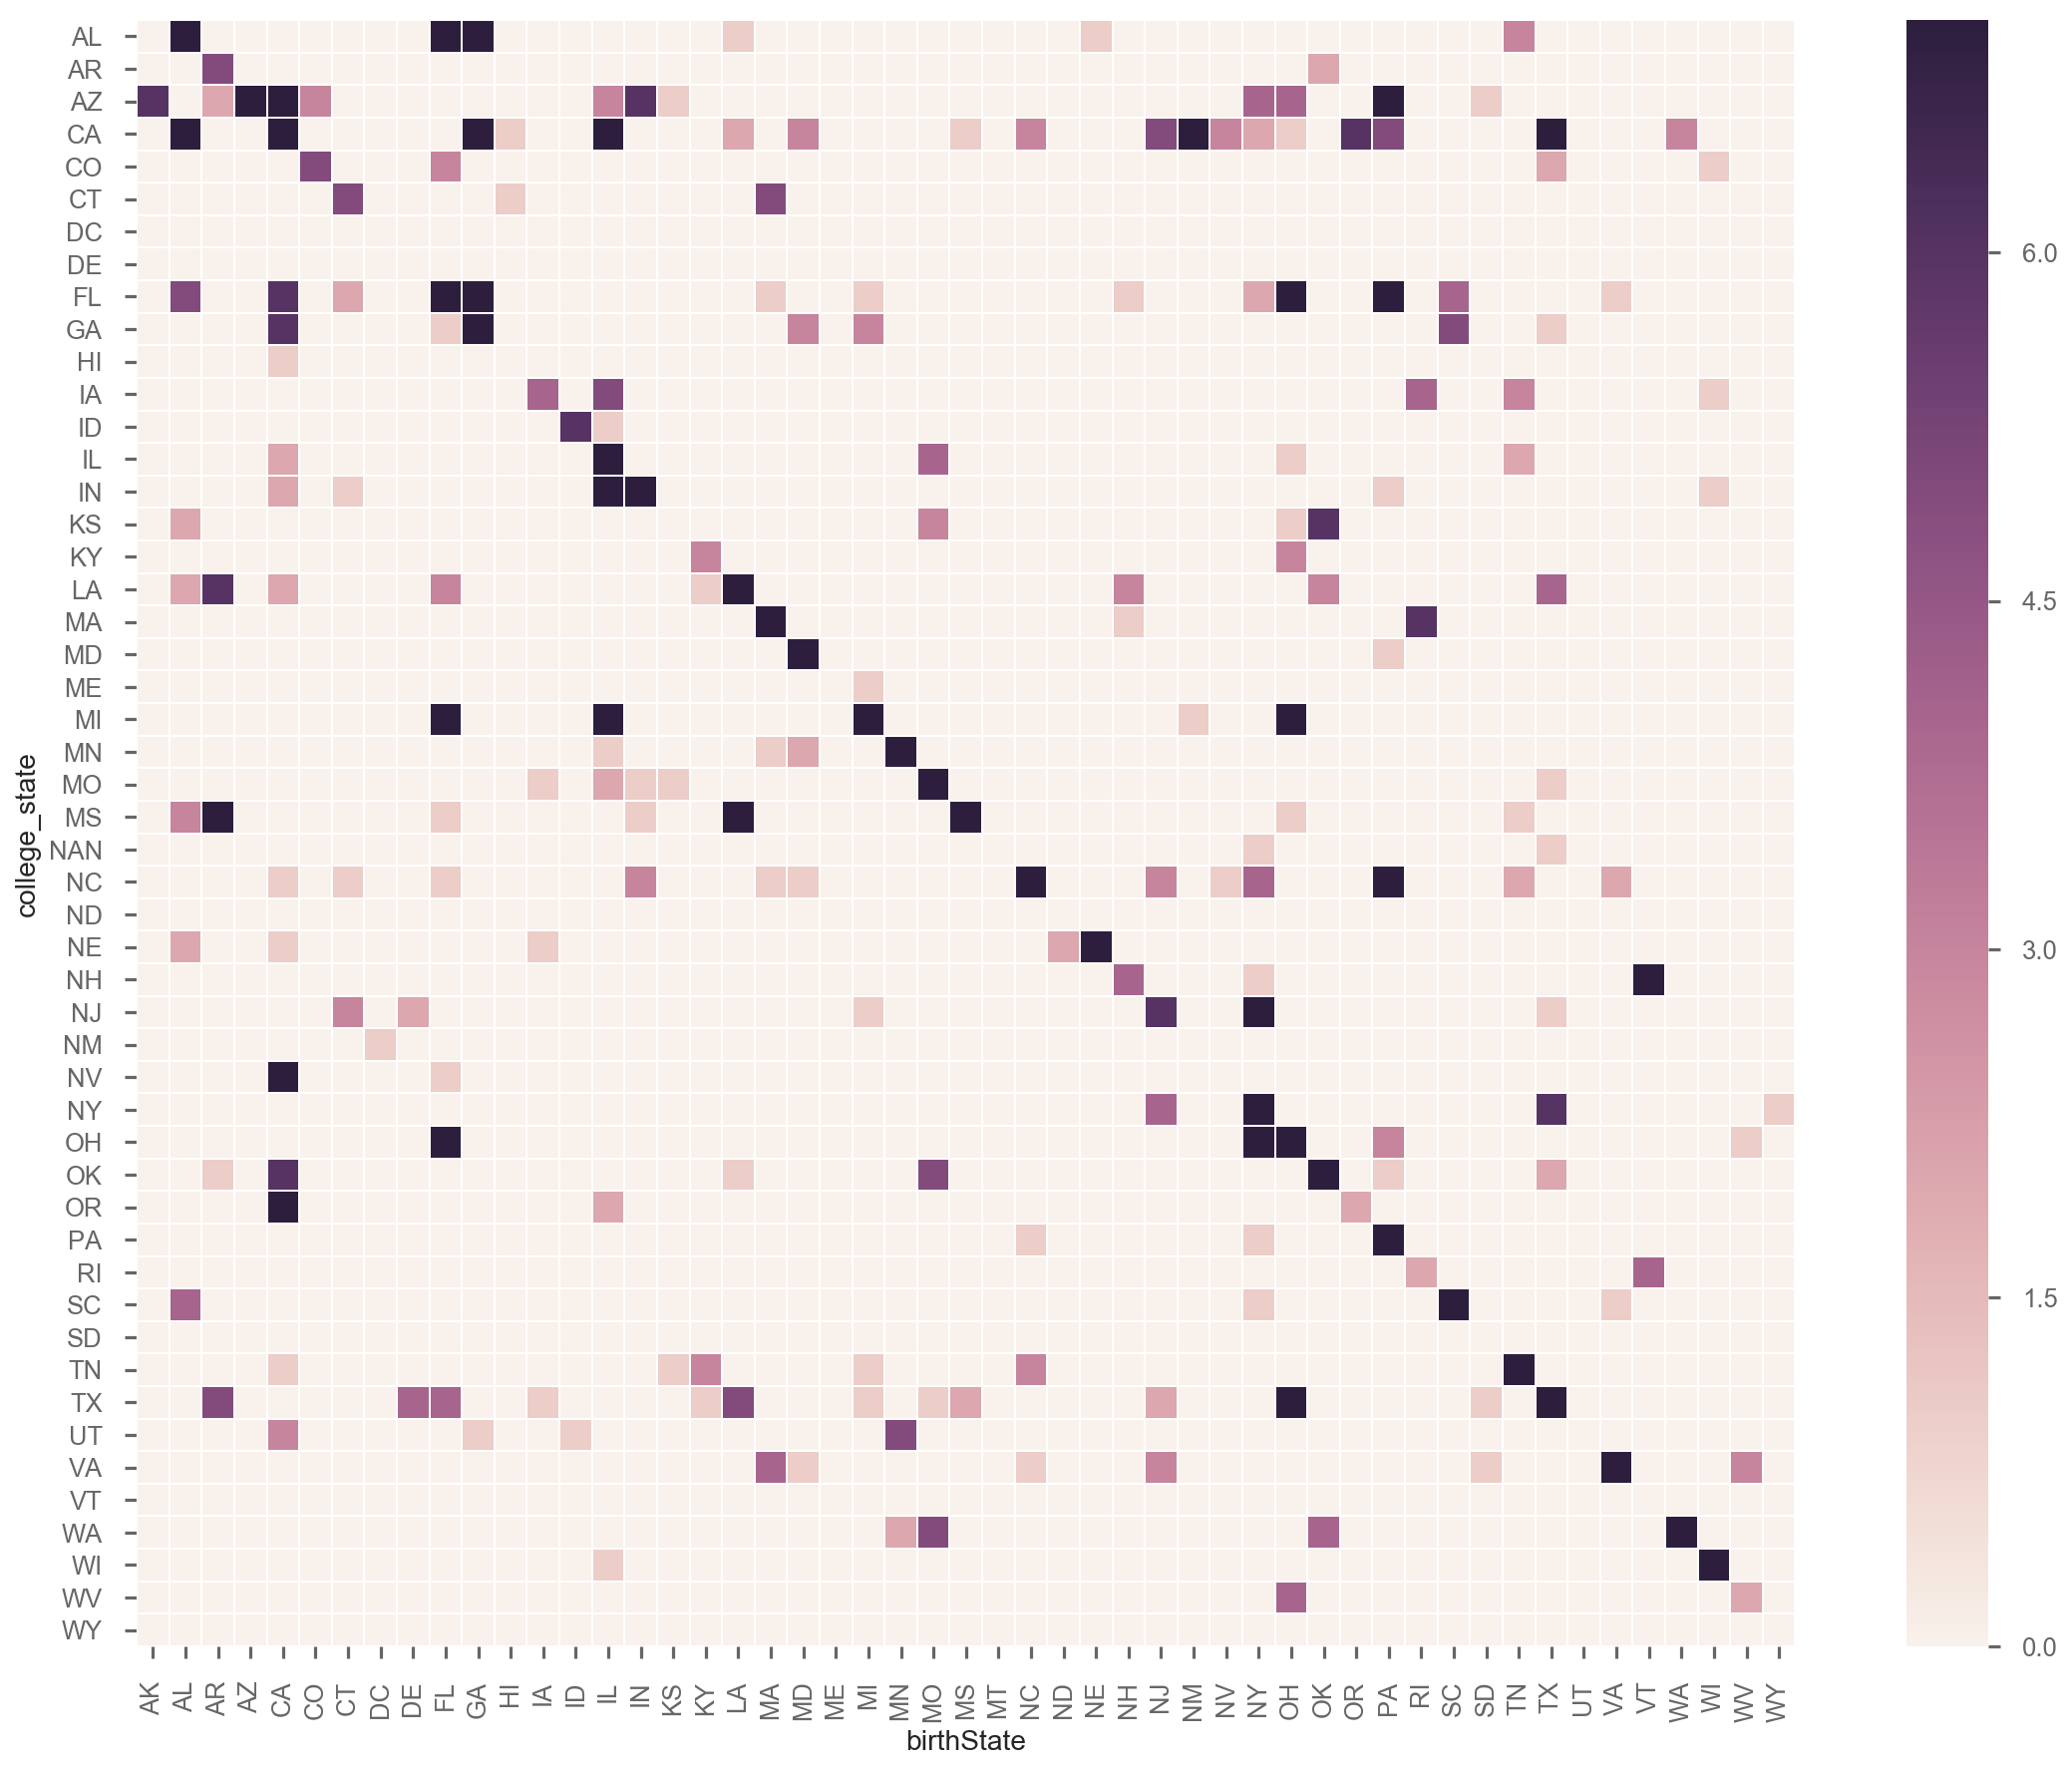

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(df_2d['allstar_count'], linewidths=.5, square=True, robust=True)

California (CA), Arizona (AZ) and Texas (TX) all show that they have colleges that have taken all star players born in other states. In the case of California because there is such a high count of players from this state, there are also a number of all star players being born in California and going on to study in different states. Arizona is an interesting state in which it has players attending college from other states but no Allstar players born in Arizona leave for other colleges in other states.

The final heat map shows a sum of all players annually standardised max salary compared to birth state and college state. A divergent colour scale is used to show if it is positive or negative, however, keep in mind this is is the sum of all players in the pair of states so states with very few players compared to pairs of states with a much higher number of players will act differently. An extremely high or low value may just be that there is only one player from that state. This is a flaw in the plot but at this stage in the investigation, the sum gives an impression if there are any general trends regarding baseball players from those states.

The figure highlights the same diagonal trend of players attending college in the same state they were born in.

For college state California (CA), Florida (FL), NC (North Carolina)and Texas (TX) each have players born in a wide range of states, each has players born in almost every state.

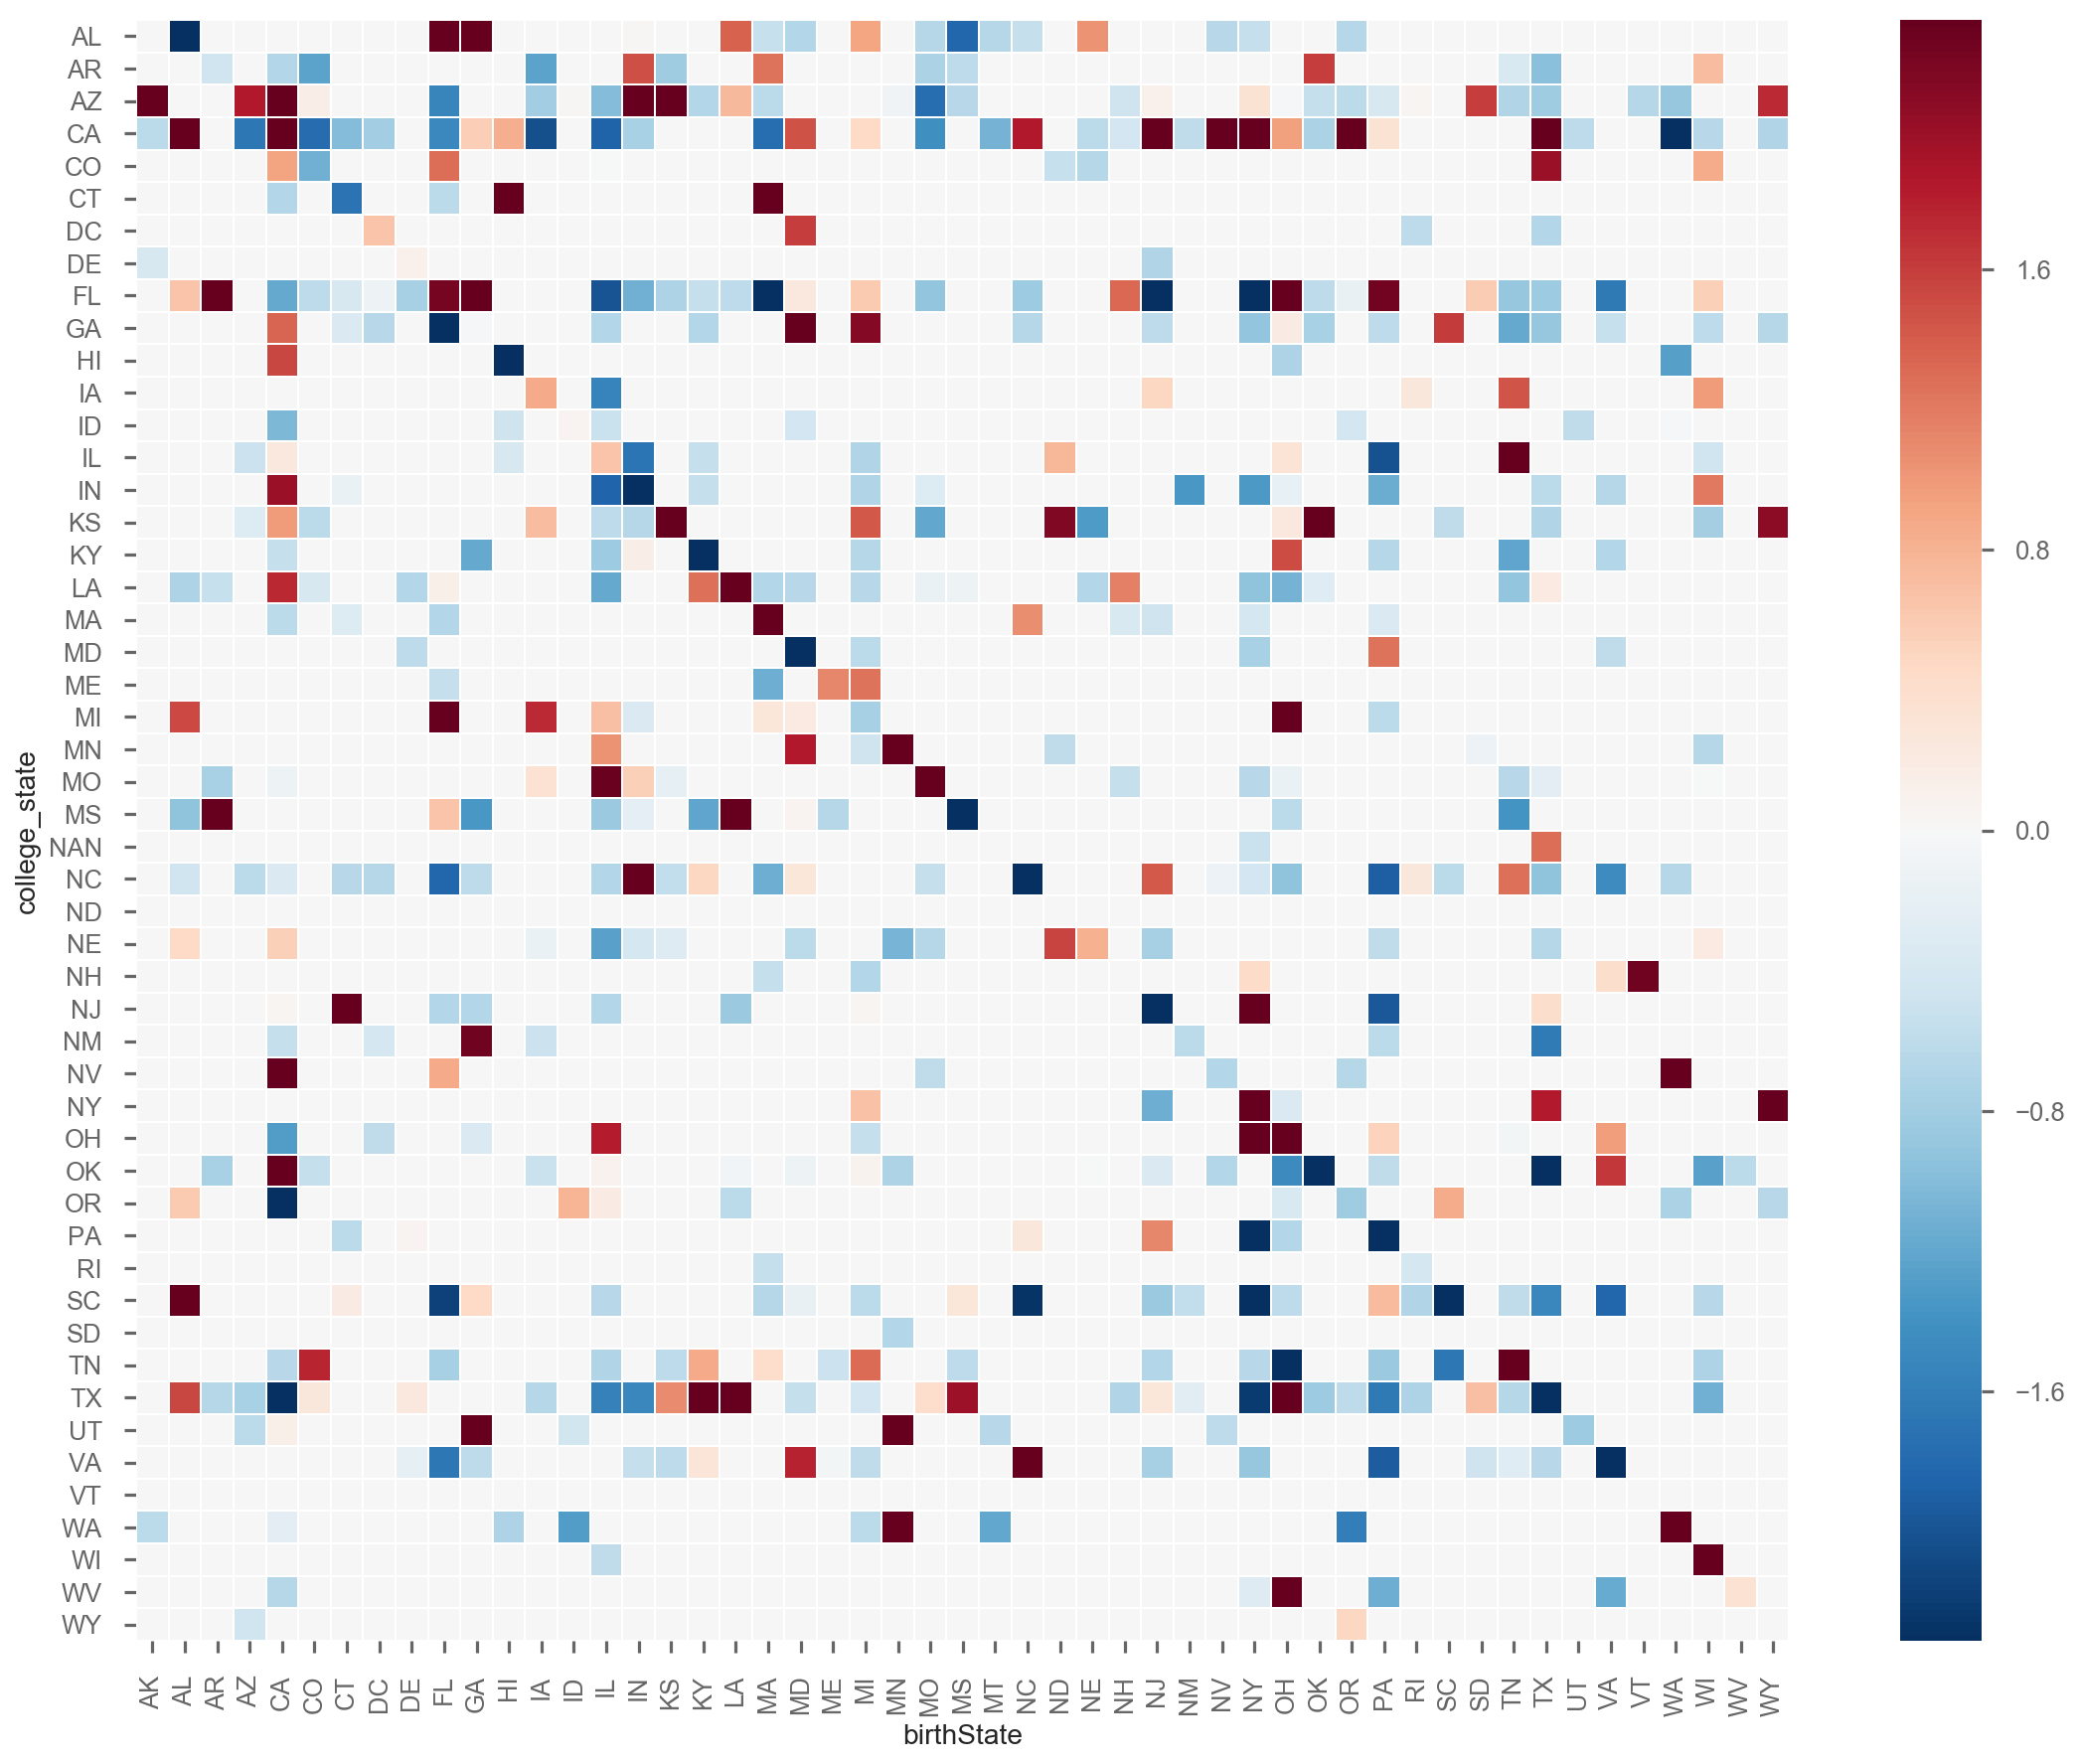

In [33]:
plt.figure(figsize=(20,15))
fig = sns.heatmap(df_2d['max_salary_standardized_annually'], center=0, linewidths=.5, square=True, robust=True)

North Carolina as a college state has more negative values than most other college states.

California has the most positive values compared to another college states.

This could be continued by taking samples of players from different states and designing a hypothesis test to investigate if there is a statistically significant difference between these groups.

## Conclusions

This analysis is not thorough so any conclusions are tentative. The project asked the question where do the best base ball players come from.

The majority of base ball players come from within the USA. California is where the most base ball players have been born and where most have gone to college.

The majority of baseball players have attended college in the same state they were born in.

There are differences between states in the typical quality of baseball players, however, this also relates to the number of players coming from or studying in each state.

Height and weight to not show strong relationships to the quality of a player.

Quality of player could be defined as a combination of variables, this analysis could use formal statistical tests to take these ideas further.

## Data processing

### Approach to data processing

Take the MASTER.csv table and use this as a central source for unique playerID, this will relate to many other tables.

Attributes will be needed to describe the location each player is from.

MASTER.csv also contains, birthCountry, birthState, birthCity which will be useful to investigate this question.

Schools and CollegePlaying are interesting candidates for positional information containing schoolCity, schoolState, schoolID are all values to explore.

CollegePlaying.csv gives the data, while Schools.csv gives the lookup to what the values in schoolID mean.

These will give a variety of values about where the player came from.

Salaries, AwardsPlayers, AllStarFull and/or HallofFame can be used to give an indication to the quality of the player.

### Data processing workflow

Files are all csv files of high quality. playerID acts as a common key across different csv files.

Each file will be concatenated into the index of College Location, therefore reducing the data set only to areas where College information is available.

#### Master

MASTER.csv is a key dataset to look up playerID along with a number of key attributes needed for investigating where a player is from.

#### College location

CollegePlaying.csv and Schools.csv will need to be manipulated to give the location of the school. This will lead to city, state and country for each school.

One person can attend more than one school. For brevity, it is better to reduce this to one selection.

For simplicity, this is chosen alphabetically. So given a tie, tulane is selected over vandy. This will create a bias in the selection criteria but is good enough for the moment.

Each player´s selected school's city, state and country will be appended to the player from Schools.csv

Some errors occur when trying to match schoolID from CollegePlaying.csv to Schools.csv. At least one occurrence was found where it could not find a value from CollegePlaying.csv in Schools.csv. When this occurred the current solution is to replace the value with 'NAN'.

#### Quality of player - Dependent variables

To see if there are any relationships between relatively better or worse players some form of an attribute will be needed to qualify quality.

These will form a variety of variables that could be dependent on other variables.

#### Salaries

Salaries are one option, this data is delivered on a yearly basis. This would need to be manipulated into a single value, e.g. mean yearly salary. However, this will not compare well over time so would need to be compared to other salaries in that year.

Salary data has only been collected since 1985. Given that salary changes over time due to a combination of factors, it is difficult to compare one year to another year.

Processing includes standardizing salary annually to see which players earn more than others for each year.

To be able to make some simple comparisons each player´s career salary information needs to be compressed into single values. Min, max and mean have been chosen, for annually standardized and unstandardized.

#### AwardsPlayers

AwardsPlayers gives a value that could be manipulated into a number of awards per player.

Processed to find the number of times a player has received an award.

Awards go back to 1877, however, the occurrence of awards varies over time as the number of awards given out per year changes.

#### AllStarFull

AllStarFull could also give a number of times present in the All Star game classifier.

Processed to find the number of times a player has played in an all star game.

Data only begins at 1933. The highest number of occurrences in all star games is 25 by aaronha01.

#### HallofFame

HallofFame can also give a qualifier to compare to.

Processed to find all inducted members within the hall of fame.

Data only begins at 1933. There are 250 players in the hall of fame.

#### Other

There are a number of limitations to these approaches related to how each of these has changed through time.

Performance statistics like Batting or Fielding could be used but will be left out for this analysis.

## Resources used

Pandas API

Seaborn Tutorial

How to change x and y limits with seaborn

matplotlib api

reStructeredText style guide.

StackOverFlow for number of times a value occurs in a column query - Link

StackOverflow how to transpose a dataset using groupby query - Link_

Code block for download_progress_hook() was taken from Udacity Tensorflow Example notebook.

Color choice for charts